# Final Individual Report

## Author: David Mateo Carpio Rivas

## Libraries

In [2501]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import time
from collections import deque
import pickle
from scipy.linalg import expm
import scipy.stats as stats
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error  # Import MSE function
from scipy.special import erf

from scipy.special import erfc
from scipy.stats import ks_2samp, chisquare

from networkx.algorithms import community
from scipy.interpolate import interp1d
from matplotlib.ticker import AutoMinorLocator
from networkx.algorithms import community
from community import community_louvain
import networkx.algorithms.community as nx_comm

#Colors
blues = plt.colormaps['Blues']
cmap1 = blues(np.linspace(0.0, 1, 10))

greys = plt.colormaps['Greys']
cmap2 = greys(np.linspace(0.0, 1, 10))

## Upload Network

In [2357]:
# Load the newly provided CSV files
edges_file = "networks/L2.csv/edges.csv"
nodes_file = "networks/L2.csv/nodes.csv"

# Read the data into DataFrames
edges = pd.read_csv(edges_file)
nodes = pd.read_csv(nodes_file)

# Create the graph
G = nx.Graph()

# Add nodes with attributes from the new file
for _, row in nodes.iterrows():
    G.add_node(row['# index'], name=row.get(' name', None), pos=np.array(eval( row.get(' _pos', None).split('array(')[1].rstrip(')')  ) )  )  # Add name if it exists

# Add edges from the new file
for _, row in edges.iterrows():
    G.add_edge(row['# source'], row[' target'])



In [2465]:
len(G[76])

354

# Part I Network Structural Analysis


## a) Number of nodes, links, network density, average degree.

### Number of nodes and links

In [2361]:
n = len(G)
m = len(G.edges)
print(f"Total nodes = {n}. Total links = {m}")

Total nodes = 5524. Total links = 94219


### Average Degree and its variance

In [2363]:
def degree(G, node):
    """
    Calculates the Degree of a node in a network G.

    Args:
        G: network.
        node: node i

    Returns:
        k_i: degree of node i  
    """
    ki = len(list(G.neighbors(node)))

    return ki
    

In [2364]:
def degrees(G):
    """
    Calculates the Degree of all nodes in a network G.

    Args:
        G: network.

    Returns:
        k_is: array withe the degree of all nodes
    """
    N = len(G)
    kis = np.zeros(N)
    i = 0
    
    for node in G.nodes():
        kis[i] = degree(G,node)
        i += 1
    return kis

In [2375]:
def average_degree(G):
    """
    Calculates the average degree in a network G.

    Args:
        G: network.

    Returns:
        k_ave: average_degree  
    """
    n = len(G)
    k = degrees(G)
    k_ave = sum(k)/n
    std = np.std(k)
    return k_ave, std

In [2377]:
k_ave, std = average_degree(G)

In [2381]:
print("Average degree =",k_ave, "Standar deviation of the degrees =",std)

Average degree = 34.112418537291816 Standar deviation of the degrees = 31.811125677784876


### Network Density

In [21]:
def degree(G, node):
    """
    Calculates the Degree of a node in a network G.

    Args:
        G: network.
        node: node i

    Returns:
        k_i: degree of node i  
    """
    ki = len(list(G.neighbors(node)))
    
    return ki
    

In [22]:
def degrees(G):
    """
    Calculates the Degree of all nodes in a network G.

    Args:
        G: network.

    Returns:
        k_is: array withe the degree of all nodes
    """
    N = len(G)
    kis = np.zeros(N)
    i = 0
    
    for node in G.nodes():
        kis[i] = degree(G,node)
        i += 1
    return kis

In [23]:
def density(m,n):
    delta =2*m/(n*n-1)
    return delta

def measure_density(G):
    n = len(G)
    k = degrees(G)
    m = sum(k)/2
    delta = density(m,n)
    return delta
    

In [29]:
delta = measure_density(G)
print("Edge density =", delta)

Edge density = 0.006175311306154518


## b) Average clustering coefficient of the nodes

In [118]:
def clustering_coefficient(G,n):
    """
    Calculate clustering coeficiente for each node in G

    Args:
        G: network
        n: node 
    Returns:
        dict: dictionary {node: c_i}.
    """
    clustering = np.zeros(n)  
    for node in G.nodes():
        neighbors = list(G.neighbors(node))  
        k = len(neighbors) 
        
        if k < 2: 
            clustering[node] = 0.0
            continue
        
        
        triangles = 0
        for i in range(len(neighbors)):
            for j in range(i + 1, len(neighbors)):
                if neighbors[j] in G.neighbors(neighbors[i]):
                    triangles += 1
        
        clustering[node] = (2 * triangles) / (k * (k - 1))
    
    return clustering


In [120]:
c_s = clustering_coefficient(G,n)

In [132]:
C = np.sum(c_s)/n
print(f"Average clustering coefficient (Watts-Strogatz): {C}")

Average clustering coefficient (Watts-Strogatz): 0.3610637649776439


### Using networkX

In [305]:
print(f"Average clustering coefficient using network X(Watts-Strogatz): {nx.average_clustering(G)}")

Average clustering coefficient using network X(Watts-Strogatz): 0.36105960364568807


## c) Global clustering coefficient (Newman transitivity)

In [137]:
def transitivity_index(G):
    """
    Calculate the transitivity index T:
    
    Args:
        G: the networks.

    Returns:
        T: transitivity index
    """
    triangles = 0 
    paths_length_2 = 0  

    for v in G.nodes():
        neighbors = list(G.neighbors(v))  
        k = len(neighbors)  
                
        paths_length_2 += k * (k - 1) / 2  
        
        for i in range(len(neighbors)):
            for j in range(i + 1, len(neighbors)):
                if neighbors[j] in G.neighbors(neighbors[i]):
                    triangles += 1
    
    if paths_length_2 == 0:
        return 0.0
    
    T = (triangles) / paths_length_2
    return T


In [141]:
T = transitivity_index(G)


In [143]:
print(f"Transitivity index: {T}")

Transitivity index: 0.22240102035537285


### Using networkX

In [145]:
print(f"Transitivity index by networkX: {nx.transitivity(G)}")

Transitivity index by networkX: 0.2223911602344453


## d) Average Path Length and Diameter

### Average Path Length

In [128]:
PL = nx.average_shortest_path_length(G)

In [129]:
print(f"Average shortest path length: {PL}")

Average shortest path length: 3.5038409584145715


### Diameter of the network

In [15]:
def bfs(G, start_node):
    """
    Perfomr BFS for a node
    
    Args:
        start node
        
    Returns: sets of minimum distances to each node in G
    """ 
    visited = {node: False for node in G.nodes()} 
    distance = {node: float(0) for node in G.nodes()} 
    queue = deque([start_node]) #Define a queue 
    visited[start_node] = True
    distance[start_node] = 0

    
    while queue: 
        node = queue.popleft() 
        for neighbor in G.neighbors(node):
            if not visited[neighbor]:
                visited[neighbor] = True
                distance[neighbor] = distance[node] + 1
                queue.append(neighbor)

    return distance


In [19]:
def calculate_diameter(G):
    """
    Calculate diameter of the network G.

    Args:
        G: Graph, undirected, and conex.

    Returns:
        int: diameter.
    """
    max_distance = 0 
    for node in G.nodes():
        distances = bfs(G, node) #extract all minimum distance for a node 
        farthest_distance = max(distances.values()) #Take the maximum distance
        max_distance = max(max_distance, farthest_distance) #Compare
    
    return max_distance


In [21]:
# Network X function
start = time.time()
# Calcular el diámetro
diameter = calculate_diameter(G)
print(f"Diameter of the grap (my function) is: {diameter}")
end = time.time()
print("time to compute=",end-start)

Diameter of the grap (my function) is: 9
time to compute= 256.76741003990173


In [161]:
start = time.time()
print(f"Diameter of the network using networkX {nx.diameter(G)}")
end = time.time()
print("time to compute=",end-start)

Diameter of the network using networkX 9
time to compute= 229.6033821105957


## e) Degree distribution of the network

### PDF

In [2383]:
def degree_dist(G):
    k_s = list(degrees(G))
    k_max = max(k_s)
    #n_k = np.zeros(int(k_max))
    n_k = []
    #k_values = np.zeros(int(k_max))
    k_values = []
    for i in range(1, int(k_max)+1):
        count = k_s.count(i)
        if count != 0:
            n_k.append(count)
            k_values.append(i)
        #n_k[i-1] = k_s.count(i)
        #k_values[i-1] = i-1
    return n_k, k_values

In [2385]:
k_s = degrees(G)
probabilities = k_s/n

In [2387]:
n_k, k_values = degree_dist(G)

In [2389]:
max(k_s)

417.0

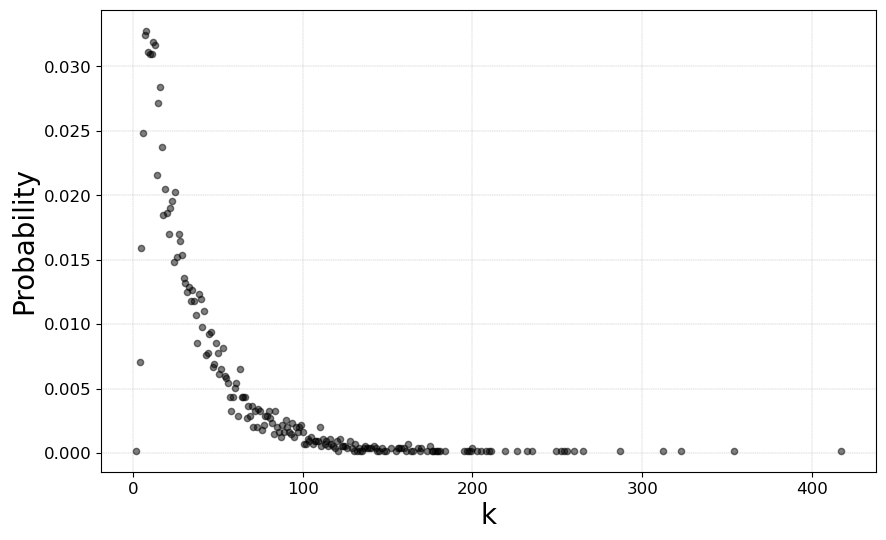

In [2391]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, np.array(n_k)/n,linestyle='',marker = 'o',markersize=4.5,color=cmap2[9],alpha=0.5)
plt.xlabel('k', fontsize=20)
plt.ylabel('Probability', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.grid(linestyle='--', linewidth=0.3)

# plt.savefig('figures/facebook_pdf.png', dpi=300, bbox_inches='tight')
plt.show() 

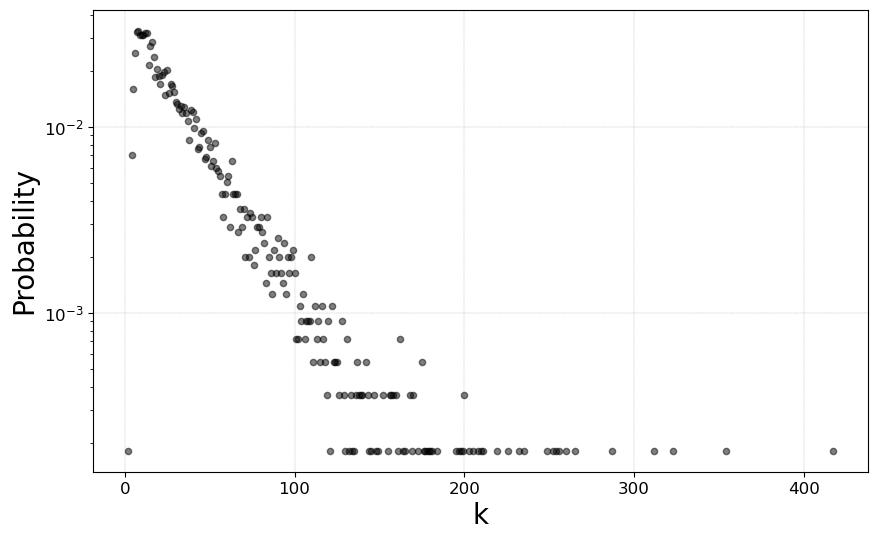

In [2392]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, np.array(n_k)/n,linestyle='',marker = 'o', markersize=4.5,color=cmap2[9],alpha=0.5)
plt.xlabel('k', fontsize=20)
plt.ylabel('Probability', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.grid(linestyle='--', linewidth=0.3)
plt.yscale('log')
# plt.xscale('log')
plt.show() 

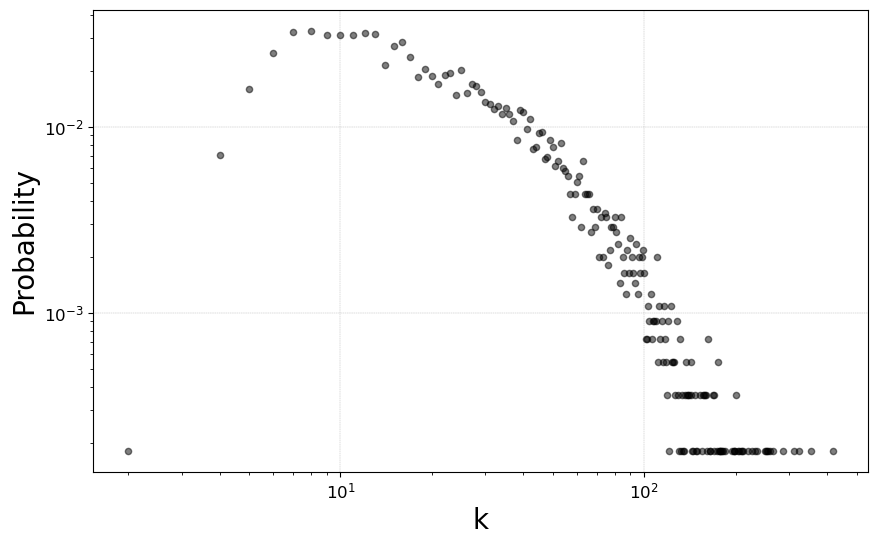

In [2394]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, np.array(n_k)/n,linestyle='',marker = 'o', markersize=4.5,color=cmap2[9],alpha=0.5)
plt.xlabel('k', fontsize=20)
plt.ylabel('Probability', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.grid(linestyle='--', linewidth=0.3)
plt.yscale('log')
plt.xscale('log')
plt.show() 

### CDF

In [2398]:
def cdf_distribution(probabilities):
    cdf = []
    counter = 0
    for i in probabilities:
        counter += i 
        cdf.append(counter)
    return cdf

In [2400]:
CDF_data = cdf_distribution(np.array(n_k)/n)

In [2402]:
CDF_data[-1]

1.0000000000000033

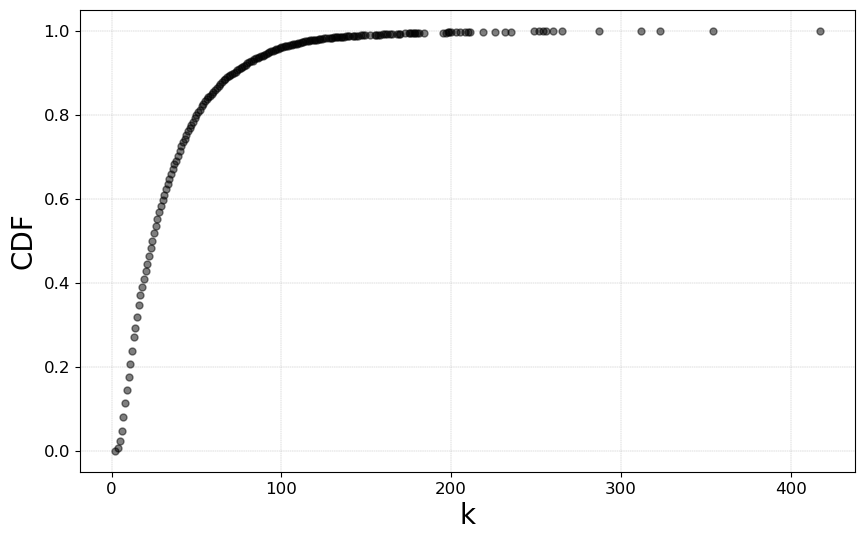

In [2404]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, CDF_data,linestyle='',marker = 'o',markersize=5,color=cmap2[9],alpha=0.5)
plt.xlabel('k', fontsize=20)
plt.ylabel('CDF', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.grid(linestyle='--', linewidth=0.3)
plt.show() 

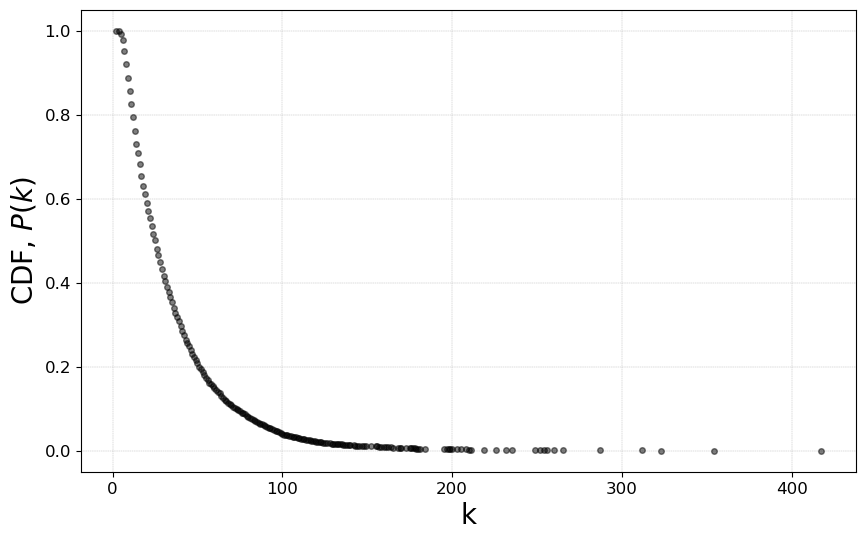

In [2406]:
plt.figure(figsize=(10, 6))
plt.plot(k_values,1 - np.concatenate([np.array([0]), CDF_data[:-1]]), linestyle='',label="L2 network",marker = 'o',markersize=4,color=cmap2[9],alpha=0.5)
plt.xlabel('k', fontsize=20)
plt.ylabel(r"CDF, $P(k)$", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.grid(linestyle='--', linewidth=0.3)
plt.show() 

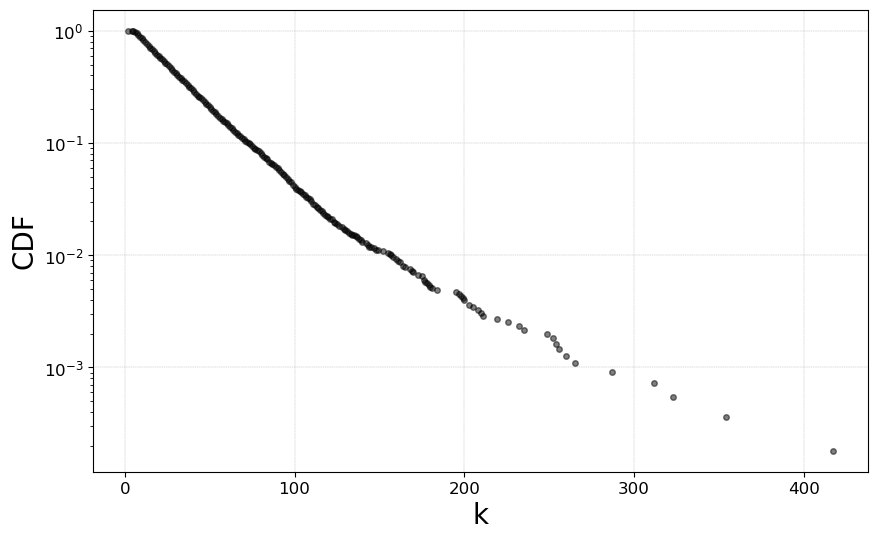

In [2408]:
plt.figure(figsize=(10, 6))
plt.plot(k_values,1 - np.concatenate([np.array([0]), CDF_data[:-1]]), linestyle='',label="L2 network",marker = 'o',markersize=4,color=cmap2[9],alpha=0.5)
plt.xlabel('k', fontsize=20)
plt.ylabel('CDF', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.grid(linestyle='--', linewidth=0.3)
plt.yscale('log')
plt.show() 

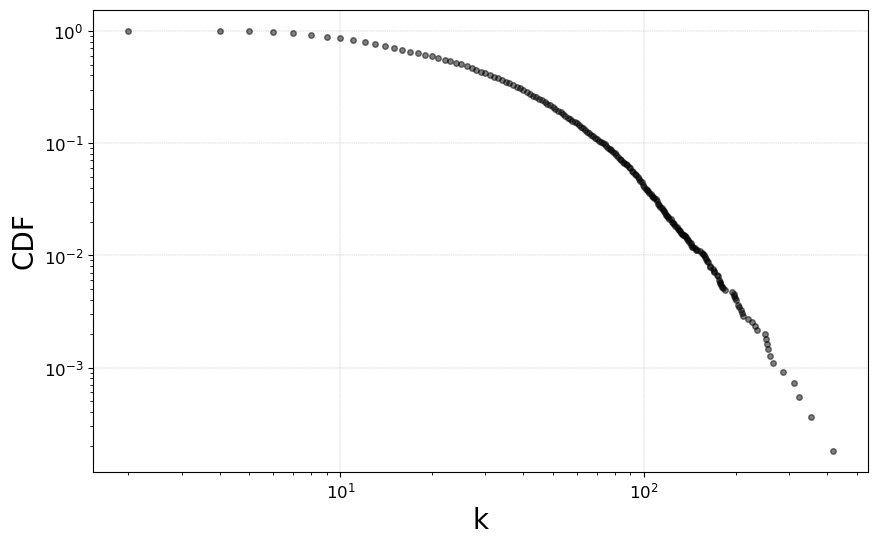

In [2410]:
plt.figure(figsize=(10, 6))
plt.plot(k_values,1 - np.concatenate([np.array([0]), CDF_data[:-1]]), linestyle='',label="L2 network",marker = 'o',markersize=4,color=cmap2[9],alpha=0.5)
plt.xlabel('k', fontsize=20)
plt.ylabel('CDF', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.grid(linestyle='--', linewidth=0.3)
plt.yscale('log')
plt.xscale('log')
plt.show() 

### Fits

In [2414]:
n_k, k_values = degree_dist(G)
# Normalize frequencies to get probabilities
p_k = n_k / np.sum(n_k)
# Generate fitted values
k_fit = np.linspace(min(k_values), max(k_values)+1, 500)

#### PDF

In [2417]:
# Define the exponential function
def exponential(k,lambda_):
    return lambda_ * np.exp(-lambda_ * k)


def weibull_pdf(k, beta, alpha):
    return (beta / alpha) * (k / alpha) ** (beta - 1) * np.exp(-(k / alpha) ** beta)

def lognormal_pdf(k, sigma, mu):
    return (1 / (k * sigma * np.sqrt(2 * np.pi))) * np.exp(-((np.log(k) - mu) ** 2) / (2 * sigma ** 2))

def powerlaw_pdf(k, gamma):
    return (gamma-1)*k**(-gamma)
    
# Define Power-Law with Exponential Cutoff PDF
def powerlaw_exp_pdf(k, C, gamma, k_c):
    return C * k**(-gamma) * np.exp(-k/k_c)

# Define EMG functions for PDF and CDF
def emg_pdf(k, mu, sigma, lambd):
    return (lambd / 2) * np.exp(lambd * (mu - k) + (lambd**2 * sigma**2) / 2) * erfc((mu - k + lambd * sigma**2) / (np.sqrt(2) * sigma))


# Define the Exponentially Modified Gaussian (EMG) PDF
def emg_pdf(k, mu, sigma, lambda_):
    return (lambda_ / 2) * np.exp(lambda_ * (lambda_ * sigma**2 / 2 - (k - mu))) * \
           erfc((-k + mu + lambda_ * sigma**2) / (np.sqrt(2) * sigma))



##### Exponential

In [2420]:
# Estimate lambda using Least Squares Fitting (LSF)
popt, pcov = curve_fit(exponential, k_values, p_k, p0=(0.1))
lambda_fit_exp = popt
print("lamda =",lambda_fit_exp )
exp_pdf_fit = exponential(k_fit, lambda_fit_exp)
pdf_exp_compare = exponential(np.array(k_values), lambda_fit_exp)
mse_pdf_exp = mean_squared_error(p_k, pdf_exp_compare)
print("MSE =",mse_pdf_exp)

ks_stat, p_value_ks = ks_2samp(p_k, pdf_exp_compare)

print(f"Kolmogorov-Smirnov Test: D = {ks_stat:.6f}, p-value = {p_value_ks:.6f}")

lamda = [0.03002543]
MSE = 1.2105009632598372e-05
Kolmogorov-Smirnov Test: D = 0.178010, p-value = 0.004629


##### Weibull

In [2423]:
# Fit the Weibull distribution using Least Squares Fitting (LSF)
popt, pcov = curve_fit(weibull_pdf, k_values, p_k)
beta_fit, alpha_fit = popt
print("beta =",beta_fit,"neta =",alpha_fit)
weibull_pdf_fit = weibull_pdf(k_fit, beta_fit, alpha_fit)

pdf_wei_compare = weibull_pdf(np.array(k_values), beta_fit, alpha_fit)
mse_weibull_pdf_fit = mean_squared_error(p_k,pdf_wei_compare )
print("MSE=",mse_weibull_pdf_fit)
ks_stat, p_value_ks = ks_2samp(p_k, pdf_wei_compare)
print(f"Kolmogorov-Smirnov Test: D = {ks_stat:.6f}, p-value = {p_value_ks:.8f}")

beta = 1.3730242151635168 neta = 29.20636466352593
MSE= 6.298860337946835e-06
Kolmogorov-Smirnov Test: D = 0.445026, p-value = 0.00000000


##### Log-Normal

In [2426]:
popt, _ = curve_fit(lognormal_pdf, k_values, p_k, p0=(1.0, np.log(np.mean(k_values))))
sigma_fit, mu_fit = popt
lognormal_pdf_fit = lognormal_pdf(k_fit, sigma_fit, mu_fit)
print("sigma=",sigma_fit,'mu=',mu_fit)

pdf_Log_norm_compare = lognormal_pdf(np.array(k_values), sigma_fit, mu_fit)

mse_pdf_log_norm = mean_squared_error(p_k, pdf_Log_norm_compare)
print("MSE=",mse_pdf_log_norm)


ks_stat, p_value_ks = ks_2samp(p_k, pdf_Log_norm_compare)

print(f"Kolmogorov-Smirnov Test: D = {ks_stat:.6f}, p-value = {p_value_ks:.6f}")

sigma= 0.8776881400770999 mu= 3.13795468895854
MSE= 2.381364055386841e-06
Kolmogorov-Smirnov Test: D = 0.172775, p-value = 0.006591


##### Power-Law

In [2429]:
# Fit the Power-Law using Least Squares Fitting (LSF)
popt, _ = curve_fit(powerlaw_pdf, k_values, p_k, maxfev=10000)
gamma_fit = popt
print("gamma =",gamma_fit)
power_law_pdf_fit = powerlaw_pdf(k_fit, gamma_fit)

pdf_PWL_compare = powerlaw_pdf(np.array(k_values), gamma_fit)
mse_pdf_pow = mean_squared_error(p_k,pdf_PWL_compare)
print("MSE =",mse_pdf_pow)

ks_stat, p_value_ks = ks_2samp(p_k, pdf_PWL_compare)

print(f"Kolmogorov-Smirnov Test: D = {ks_stat:.6f}, p-value = {p_value_ks:.6f}")

gamma = [1.09526064]
MSE = 6.570501068163457e-05
Kolmogorov-Smirnov Test: D = 0.293194, p-value = 0.000000


##### EMG

In [2432]:
# Fit the EMG distribution using Least Squares Fitting (LSF)
popt, _ = curve_fit(emg_pdf, k_values, p_k)
mu_fit2, sigma_fit2, lambda_fit2 = popt
print("mu", mu_fit2, "sigma=",sigma_fit2,"lambda=",lambda_fit2)
EMG_fit = emg_pdf(k_fit, mu_fit2, sigma_fit2, lambda_fit2)

mu 5.151076008145392 sigma= 1.3248701897606794 lambda= 0.03676286672304257


##### Power Law with exponential decay

In [2122]:
# Fit the distribution using Least Squares Fitting (LSF)
popt, _ = curve_fit(powerlaw_exp_pdf, k_values, p_k, p0=(1, 0.005, 0.3), maxfev=30000)
C_fit3, gamma_fit3, k_c_fit = popt
pdf_powerlaw_exp_fit = powerlaw_exp_pdf(k_fit, C_fit, gamma_fit, k_c_fit)
C_fit3, gamma_fit3, k_c_fit

pwlExp_pdf_compare = powerlaw_exp_pdf(np.array(k_values),C_fit3, gamma_fit3, k_c_fit)
mse_pwlExp_fit = mean_squared_error(p_k,pwlExp_pdf_compare)
print("MSE=",mse_pwlExp_fit)

ks_stat, p_value_ks = ks_2samp(p_k, pwlExp_pdf_compare)
print(f"Kolmogorov-Smirnov Test: D = {ks_stat:.6f}, p-value = {p_value_ks:.6f}")

MSE= 4.874327756152101e-06
Kolmogorov-Smirnov Test: D = 0.445026, p-value = 0.000000


/var/folders/p2/wf0p252n7mjfjwt2py5yxhv80000gn/T/ipykernel_1007/541305747.py:17: RuntimeWarning: overflow encountered in power
  return C * k**(-gamma) * np.exp(-k/k_c)


### Plots

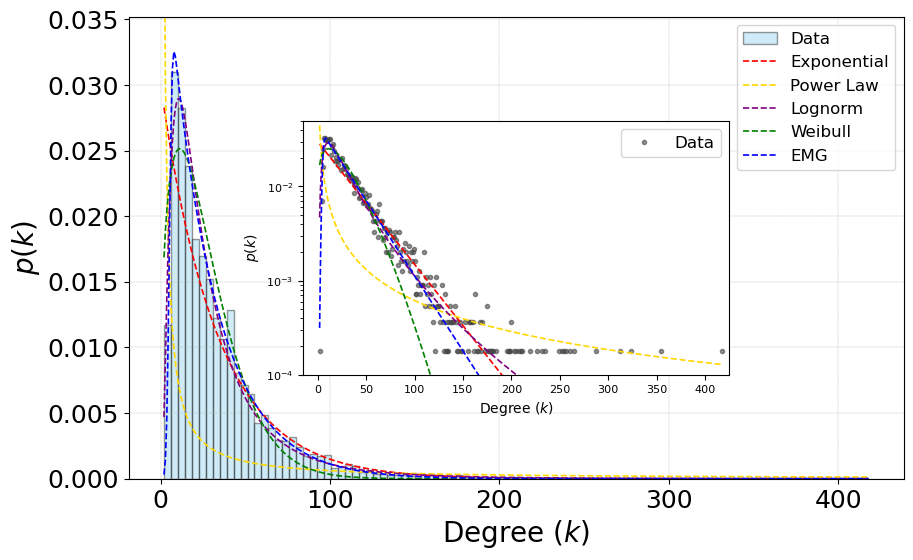

In [2477]:
# Create the main figure
fig, ax_main = plt.subplots(figsize=(10, 6))

# Histogram (Main Plot)
pdf, bins, _ = ax_main.hist(k_is, bins=101, density=True, color='skyblue', alpha=0.4, edgecolor='black', label="Data")

lw=1.2
# Plot different distributions
ax_main.plot(k_fit, exp_pdf_fit, color='red', linestyle='--', linewidth=lw,label=f'Exponential')
ax_main.plot(k_fit, power_law_pdf_fit, 'gold', linestyle='--',linewidth=lw, label=f'Power Law')
ax_main.plot(k_fit, lognormal_pdf_fit, 'purple', linestyle='--',linewidth=lw, label=f'Lognorm')
ax_main.plot(k_fit, weibull_pdf_fit, 'green', linestyle='--',linewidth=lw, label=f'Weibull')
ax_main.plot(k_fit, EMG_fit, color='blue', linestyle='--', linewidth=lw,label=f'EMG')

ax_main.grid(linestyle='--', linewidth=0.3)

# Labels and Legends
ax_main.set_xlabel(r"Degree $(k)$", fontsize=20)
ax_main.set_ylabel(r"$p(k)$", fontsize=20)
ax_main.tick_params(axis='both', which='major', labelsize=18)
ax_main.legend(fontsize=12)
ax_main.set_ylim(0,0.0352)

# Create the inset plot
ax_inset = inset_axes(ax_main, width="55%", height="55%", loc="center")  # Adjust size and position

# Inset Plot - Log-Log Scale
ax_inset.plot(k_values, p_k, linestyle='',marker = 'o',markersize=3,color=cmap2[7],alpha=0.6, label="Data")
ax_inset.plot(k_fit, exp_pdf_fit, color='red', linestyle='--', linewidth=lw)
ax_inset.plot(k_fit, power_law_pdf_fit, 'gold', linestyle='--',linewidth=lw)
ax_inset.plot(k_fit, lognormal_pdf_fit, 'purple', linestyle='--',linewidth=lw)
ax_inset.plot(k_fit, weibull_pdf_fit, 'green', linestyle='--',linewidth=lw)
ax_inset.plot(k_fit, EMG_fit, color='blue', linestyle='--',linewidth=lw)

# ax_inset.set_xscale('log')
ax_inset.set_yscale('log')
ax_inset.set_xlim(min(k_values), max(k_values))  # Adjust limits if needed
ax_inset.set_ylim(10**-4, 0.05)
ax_inset.set_xlim(-15,425)
# Inset Labels
ax_inset.set_xlabel(r"Degree $(k)$", fontsize=10)
ax_inset.set_ylabel(r"$p(k)$", fontsize=10)
ax_inset.tick_params(axis='both', which='major', labelsize=8)
ax_inset.legend(fontsize=12)

# plt.savefig("figures/pdf.png", dpi=300, bbox_inches='tight')  # High-resolution save
# Show plot
plt.show()


### CDF

In [2503]:
def cdf_distribution(probabilities):
    cdf = []
    counter = 0
    for i in probabilities:
        counter += i 
        cdf.append(counter)
    return cdf

In [2537]:
cdf_empirical = cdf_distribution(np.array(n_k)/n)

In [2539]:
def exponential_cdf(k, lambda_):
    return 1 - np.exp(-lambda_ * k)  # CDF formula for exponential


def lognormal_cdf(k, sigma, mu):
    return 0.5 * (1 + erf((np.log(k) - mu) / (sigma * np.sqrt(2))))

def weibull_cdf(k, beta, alpha):
    return 1 - np.exp(-(k / alpha) ** beta)

def emg_cdf(k, mu, sigma, lambda_):
    return 0.5 * (1 + erf((k - mu) / (np.sqrt(2) * sigma))) - np.exp(-lambda_ * (k - mu) + (lambda_**2 * sigma**2) / 2) * \
                  0.5 * (1 + erf((k - mu - lambda_ * sigma**2) / (np.sqrt(2) * sigma)))
    


In [2558]:
k_values = np.array(k_values)

In [2560]:
len(exponential_cdf(k_values[10:], exp_lambda_cdf_fit))

181

In [2562]:
len(cdf_empirical[10:])

181

In [2594]:
popt, _ = curve_fit(exponential_cdf, k_values[5:], cdf_empirical[5:])
exp_lambda_cdf_fit = popt[0]
exp_cdf_fit = exponential_cdf(k_fit, exp_lambda_cdf_fit)
print("exp lamda:",exp_lambda_cdf_fit)

exp_compare_fit =  exponential_cdf(k_values[5:], exp_lambda_cdf_fit)
mse_cdf = mean_squared_error(cdf_empirical[5:], exp_compare_fit)
print("MSE:",mse_cdf)

ks_stat, p_value_ks = ks_2samp(cdf_empirical, exp_compare_fit)

print(f"Kolmogorov-Smirnov Test: D = {ks_stat:.6f}, p-value = {p_value_ks:.6f}")

exp lamda: 0.030420283732382092
MSE: 0.000355634660715605
Kolmogorov-Smirnov Test: D = 0.055875, p-value = 0.906529


/var/folders/p2/wf0p252n7mjfjwt2py5yxhv80000gn/T/ipykernel_1007/720863591.py:2: RuntimeWarning: overflow encountered in exp
  return 1 - np.exp(-lambda_ * k)  # CDF formula for exponential


### Log-Normal

In [2576]:
# Fit the Log-Normal CDF using Least Squares Fitting (LSF)
popt, _ = curve_fit(lognormal_cdf, k_values, cdf_empirical)
log_sigma_cdf_fit,log_mu_cdf_fit = popt
lognormal_cdf_fit = lognormal_cdf(k_fit, log_sigma_cdf_fit, log_mu_cdf_fit)
print("log sigma:",log_sigma_cdf_fit,"log mu",log_mu_cdf_fit)


lognormal_compare_fit =  lognormal_cdf( np.array(k_values), log_sigma_cdf_fit, log_mu_cdf_fit)
mse_cdf = mean_squared_error(cdf_empirical, lognormal_compare_fit)
print("MSE:",mse_cdf)

ks_stat, p_value_ks = ks_2samp(cdf_empirical, lognormal_compare_fit)

print(f"Kolmogorov-Smirnov Test: D = {ks_stat:.6f}, p-value = {p_value_ks:.6f}")

log sigma: 0.8695585044353603 log mu 3.164740165027434
MSE: 6.528948276407423e-05
Kolmogorov-Smirnov Test: D = 0.104712, p-value = 0.246294


### Weibull

In [2579]:
# Fit the Weibull CDF using Least Squares Fitting (LSF)
popt, _ = curve_fit(weibull_cdf, k_values, cdf_empirical, p0=(1.5, np.mean(k_values)))
beta_cdf_fit, alpha_cdf_fit = popt
cdf_weibull_fit = weibull_cdf(k_fit, beta_cdf_fit, alpha_cdf_fit)
print("Wie beta=",beta_cdf_fit, "Wie alpha=",alpha_cdf_fit)

cdf_weibull_compare_fit =  weibull_cdf( np.array(k_values),beta_cdf_fit, alpha_cdf_fit)
mse_cdf = mean_squared_error(cdf_empirical, cdf_weibull_compare_fit)
print("MSE:",mse_cdf)


ks_stat, p_value_ks = ks_2samp(cdf_empirical, cdf_weibull_compare_fit)

print(f"Kolmogorov-Smirnov Test: D = {ks_stat:.6f}, p-value = {p_value_ks:.6f}")

Wie beta= 1.1724256315564634 Wie alpha= 33.98023781038949
MSE: 0.0002366424989471812
Kolmogorov-Smirnov Test: D = 0.162304, p-value = 0.012942


### EMG

In [2582]:
# Fit the EMG distribution using Least Squares Fitting (LSF) on CDF
popt, _ = curve_fit(emg_cdf, k_values, cdf_empirical, p0=(5, 1, 0.04))
mu_cdf_fit, sigma_cdf_fit, lambda_cdf_fit = popt
emgcdf_fit = emg_cdf(k_fit, mu_cdf_fit, sigma_cdf_fit, lambda_cdf_fit)

print("EMG mu :",mu_cdf_fit,"EMG sigma",sigma_cdf_fit, "EMG lamda:", lambda_cdf_fit)

cdf_emg_compare_fit =  emg_cdf( np.array(k_values),mu_cdf_fit, sigma_cdf_fit, lambda_cdf_fit)
mse_cdf = mean_squared_error(cdf_empirical, cdf_emg_compare_fit)
print("MSE:",mse_cdf)


ks_stat, p_value_ks = ks_2samp(cdf_empirical, cdf_emg_compare_fit)

print(f"Kolmogorov-Smirnov Test: D = {ks_stat:.6f}, p-value = {p_value_ks:.6f}")

EMG mu : 4.16872976802954 EMG sigma 0.5638685924740187 EMG lamda: 0.034698537867740756
MSE: 1.857285811553824e-05
Kolmogorov-Smirnov Test: D = 0.094241, p-value = 0.365209


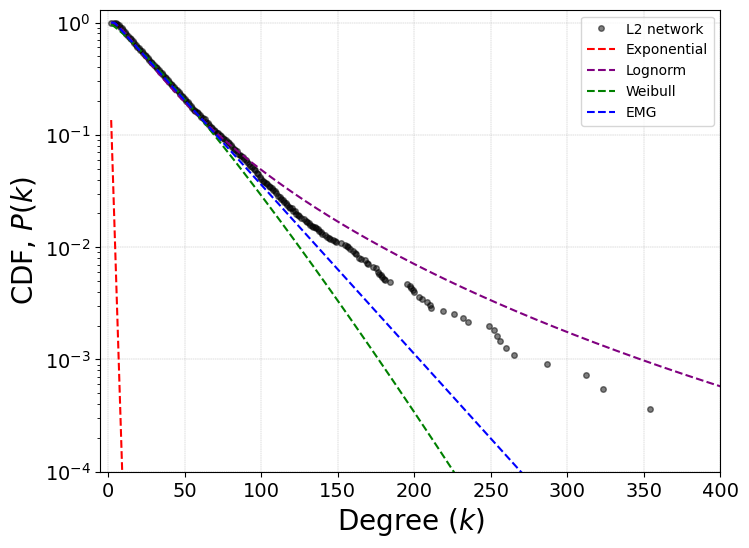

In [2589]:
plt.figure(figsize=(8,6))

plt.plot(k_values,1 - np.concatenate([np.array([0]), cdf_empirical[:-1]]), linestyle='',label="L2 network",marker = 'o',markersize=4,color=cmap2[9],alpha=0.5)

# plt.plot(k_values,1 - np.array(cdf_empirical), linestyle='',label="L2 network",marker = 'o',markersize=4,color=cmap2[9],alpha=0.5)

plt.plot(k_fit, 1 - exp_cdf_fit, 'red', linestyle='--', label=f'Exponential')
# plt.plot(k_fit, 1 -cdf_powerlaw_fit, 'gold', linestyle='--', label=f'Power Law')
plt.plot(k_fit, 1 - lognormal_cdf_fit, 'purple', linestyle='--', label=f'Lognorm')
plt.plot(k_fit, 1 -cdf_weibull_fit, 'green', linestyle='--', label=f'Weibull')
plt.plot(k_values, 1- cdf_emg_compare_fit, 'blue', linestyle='--', label=f'EMG')



plt.ylim(10**-4,1.3)
plt.xlabel(r"Degree $(k)$", fontsize=20)
plt.ylabel(r"CDF, $P(k)$", fontsize=20)
plt.legend()
plt.yscale('log')
# plt.xscale('log')

plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(linestyle='--', linewidth=0.3)

plt.xlim(-5,400)
# plt.savefig("figures/cdf_based_cdf.png", dpi=300, bbox_inches='tight')  # High-resolution save
plt.show()

In [ ]:
### Old

In [2053]:
pdf = np.array(n_k)/n

In [2055]:
# Fit distributions
k_values_fit = np.linspace(min(k_values), max(k_values), 400)  # Fit range

# Power-law fit
alpha, loc, scale = stats.powerlaw.fit(n_k, floc=0)
print("PWL", alpha, loc, scale)
powerlaw_pdf = stats.powerlaw.pdf(k_values_fit, alpha, loc=loc, scale=scale)

# Exponential fit
lambda_exp = stats.expon.fit(n_k, floc=0)
print("PWL", lambda_exp)
exponential_pdf = stats.expon.pdf(k_values_fit, *lambda_exp)

# Log-normal fit
shape, loc, scale = stats.lognorm.fit(n_k, floc=0)
lognormal_pdf = stats.lognorm.pdf(k_values_fit, shape, loc=loc, scale=scale)

# Exponentially Modified Normal (Exponnorm) fit
K_exponnorm, loc_exponnorm, scale_exponnorm = stats.exponnorm.fit(n_k, floc=0)
exponnorm_pdf = stats.exponnorm.pdf(k_values_fit, K_exponnorm, loc=loc_exponnorm, scale=scale_exponnorm)

# Gaussian (Normal) fit
mu_gaussian, sigma_gaussian = np.mean(n_k), np.std(n_k)
gaussian_pdf = stats.norm.pdf(k_values_fit, loc=mu_gaussian, scale=sigma_gaussian)

# Weibull fit
shape_w, loc_w, scale_w = stats.weibull_min.fit(n_k, floc=0)
weibull_pdf = stats.weibull_min.pdf(k_values_fit, shape_w, loc=loc_w, scale=scale_w)

PWL 0.322906724566771 0 181
PWL (0.0, 28.921465968586386)


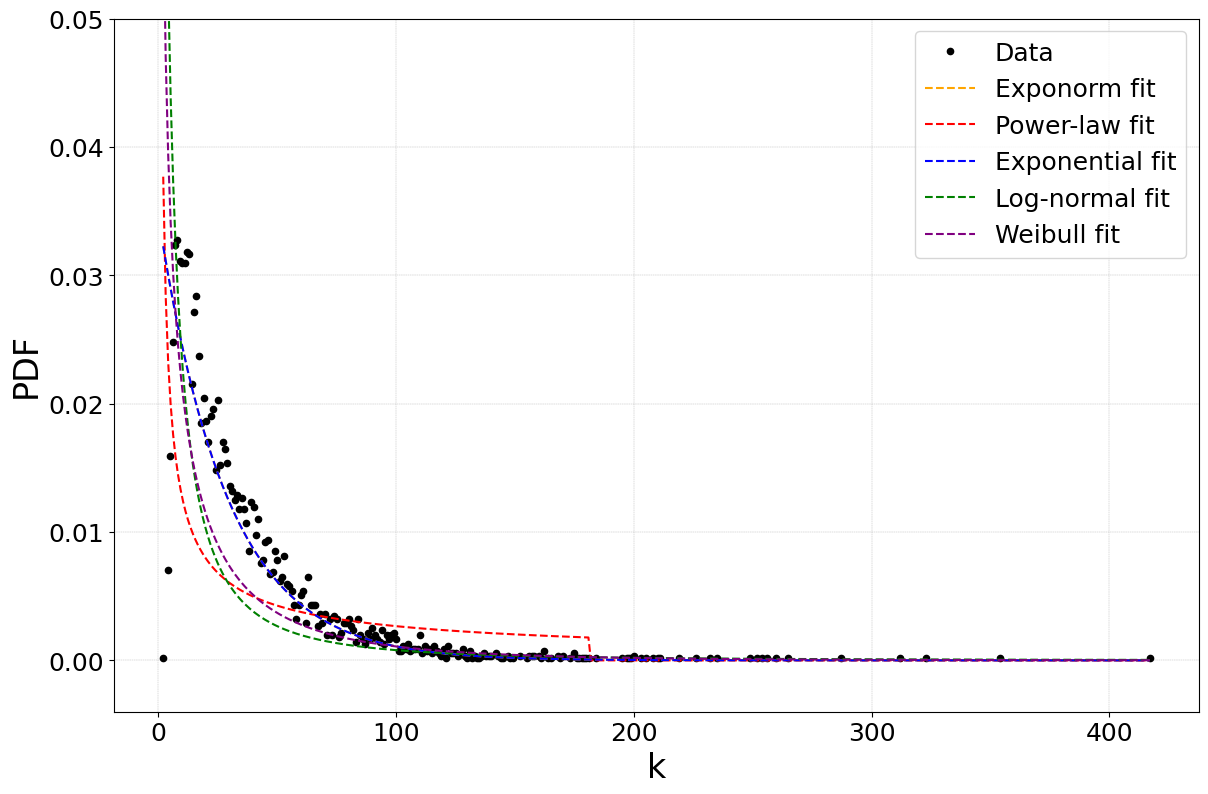

In [2061]:
# Plot empirical PDF
plt.figure(figsize=(14, 9))
plt.plot(k_values, np.array(n_k)/n, linestyle='', marker='o', markersize=4.5, color='k', label="Data")

# Plot fitted PDFs
plt.plot(k_values_fit, exponnorm_pdf, label="Exponorm fit", linestyle='--', color='orange')
# plt.plot(k_values_fit, gaussian_pdf, label="Gaussian fit", linestyle='--', color='orange')
plt.plot(k_values_fit, powerlaw_pdf, label="Power-law fit", linestyle='--', color='r')
plt.plot(k_values_fit, exponential_pdf, label="Exponential fit", linestyle='--', color='b')
plt.plot(k_values_fit, lognormal_pdf, label="Log-normal fit", linestyle='--', color='g')
plt.plot(k_values_fit, weibull_pdf, label="Weibull fit", linestyle='--', color='purple')

# Customize the plot
plt.xlabel('k', fontsize=24)
plt.ylabel('PDF', fontsize=24)
plt.legend(fontsize=18)
plt.grid(linestyle='--', linewidth=0.3)
plt.tick_params(axis='both', which='major', labelsize=18)
# plt.title("Degree Distribution PDF with Fits", fontsize=18)
plt.ylim(-0.004,0.05)
# plt.title("Degree Distribution PDF with Fits", fontsize=18)
plt.savefig('figures/facebook_PDF.png', dpi=300, bbox_inches='tight')
plt.show()

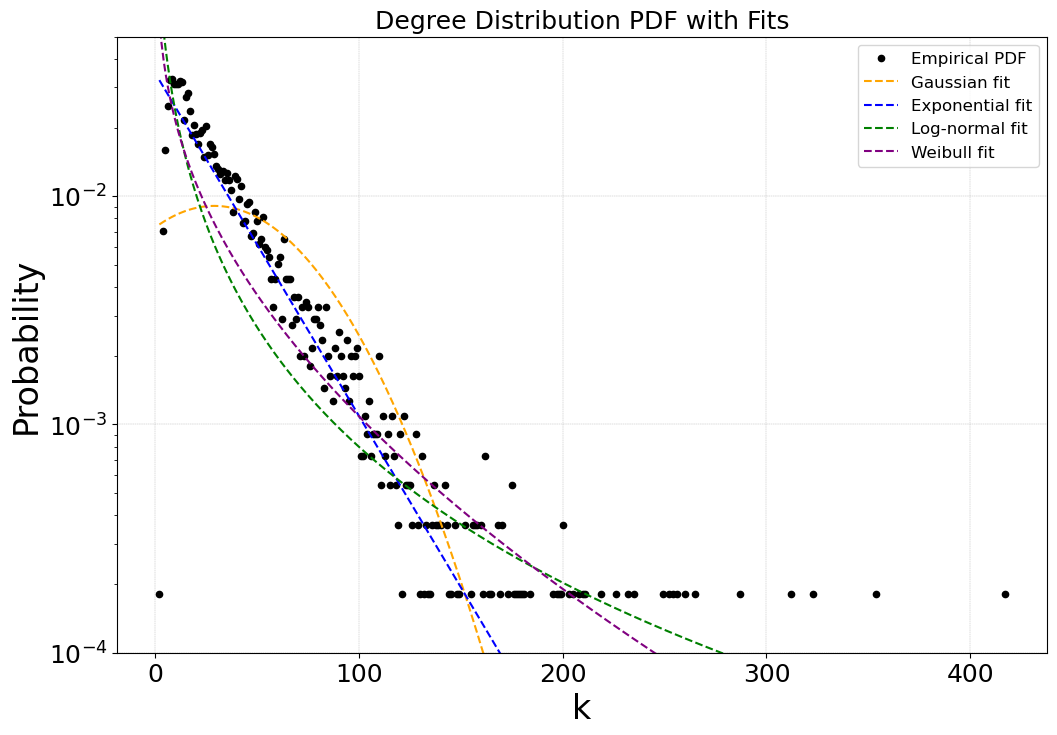

In [1973]:
# Plot empirical PDF
plt.figure(figsize=(12, 8))
plt.plot(k_values, np.array(n_k)/n, linestyle='', marker='o', markersize=4.5, color='k', label="Empirical PDF")

# Plot fitted PDFs
plt.plot(k_values_fit, gaussian_pdf, label="Gaussian fit", linestyle='--', color='orange')
# plt.plot(k_values_fit, powerlaw_pdf, label="Power-law fit", linestyle='--', color='r')
plt.plot(k_values_fit, exponential_pdf, label="Exponential fit", linestyle='--', color='b')
plt.plot(k_values_fit, lognormal_pdf, label="Log-normal fit", linestyle='--', color='g')
plt.plot(k_values_fit, weibull_pdf, label="Weibull fit", linestyle='--', color='purple')

# Customize the plot
plt.xlabel('k', fontsize=24)
plt.ylabel('Probability', fontsize=24)
plt.yscale('log')
# plt.xscale('log')
# plt.xlim(np.log(1),10**3)
plt.ylim(10**(-4),0.5*10**(-1))
plt.legend(fontsize=12)
plt.grid(linestyle='--', linewidth=0.3)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.title("Degree Distribution PDF with Fits", fontsize=18)
plt.show()

#### CDF

In [463]:
# Fit distributions
k_values_fit = np.linspace(min(k_values), max(k_values), 100)  # Fit range


# Power-law fit
alpha, loc, scale = stats.powerlaw.fit(n_k, floc=0)
powerlaw_cdf = stats.powerlaw.cdf(k_values_fit, alpha, loc=loc, scale=scale)

# Exponential fit
lambda_exp = stats.expon.fit(n_k, floc=0)
exponential_cdf = stats.expon.cdf(k_values_fit, *lambda_exp)

# Log-normal fit
shape, loc, scale = stats.lognorm.fit(n_k, floc=0)
lognormal_cdf = stats.lognorm.cdf(k_values_fit, shape, loc=loc, scale=scale)

# Gaussian (Normal) fit
mu_gaussian, sigma_gaussian = np.mean(n_k), np.std(n_k)
gaussian_cdf = stats.norm.cdf(k_values_fit, loc=mu_gaussian, scale=sigma_gaussian)

# Weibull fit
shape_w, loc_w, scale_w = stats.weibull_min.fit(n_k, floc=0)
weibull_cdf = stats.weibull_min.cdf(k_values_fit, shape_w, loc=loc_w, scale=scale_w)

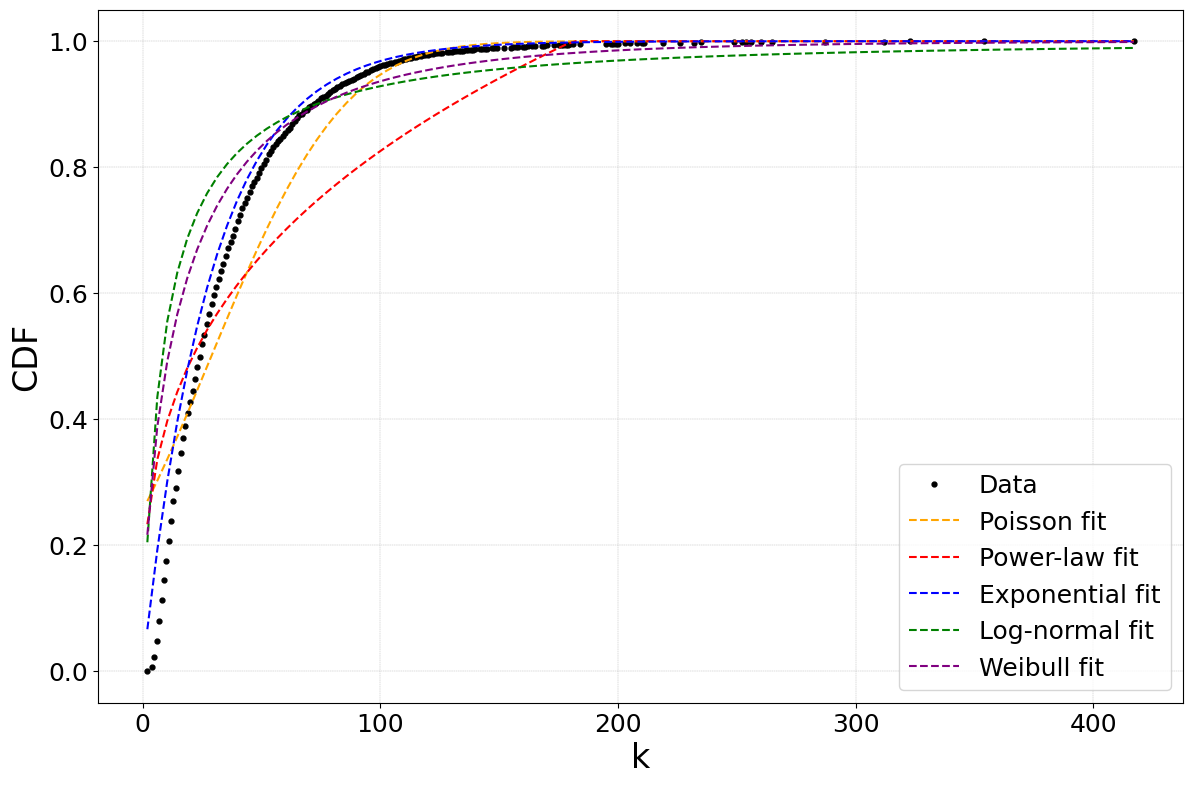

In [465]:
# Plot empirical CDF
plt.figure(figsize=(14, 9))
plt.plot(k_values, CDF,linestyle='',marker = 'o',markersize=3.5,color='k',label="Data")

# Plot fitted CDFs
plt.plot(k_values_fit, gaussian_cdf, label="Poisson fit", linestyle='--', color='orange')
plt.plot(k_values_fit, powerlaw_cdf, label="Power-law fit", linestyle='--', color='r')
plt.plot(k_values_fit, exponential_cdf, label="Exponential fit", linestyle='--', color='b')
plt.plot(k_values_fit, lognormal_cdf, label="Log-normal fit", linestyle='--', color='g')
plt.plot(k_values_fit, weibull_cdf, label="Weibull fit", linestyle='--', color='purple')
# Customize plot
plt.xlabel('k', fontsize=24)
plt.ylabel('CDF', fontsize=24)
plt.legend(fontsize=18)
plt.grid(linestyle='--', linewidth=0.3)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.savefig('figures/facebook_CDF.png', dpi=300, bbox_inches='tight')
# plt.title("Degree Distribution CDF with Fits", fontsize=18)
plt.show()

In [591]:
# (1+CDF[0])-(np.array(CDF))

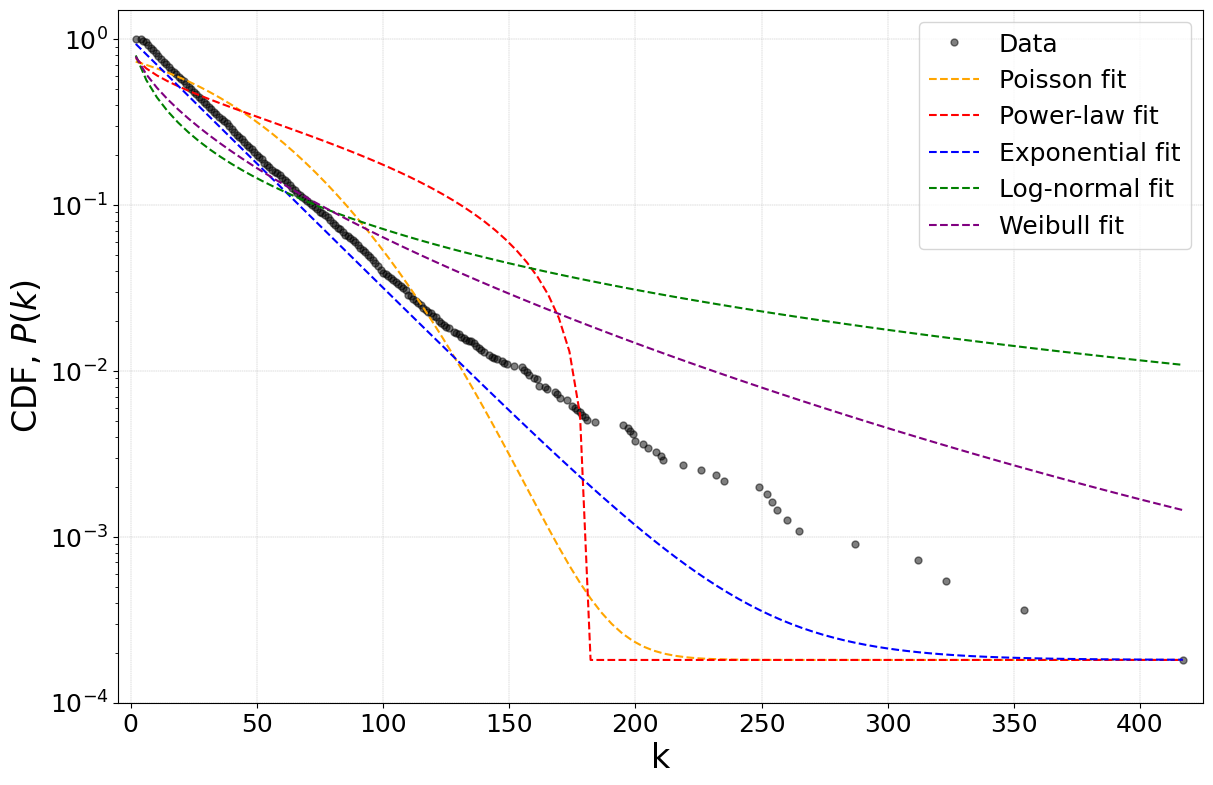

In [597]:
# Plot empirical CDF
plt.figure(figsize=(14, 9))
plt.plot(k_values, (1+CDF[0])-np.array(CDF),linestyle='',marker ='o',markersize=5,color='k',alpha = 0.5, label="Data")

# Plot fitted CDFs
plt.plot(k_values_fit, (1+CDF[0])-gaussian_cdf, label="Poisson fit", linestyle='--', color='orange')
plt.plot(k_values_fit, (1+CDF[0])-powerlaw_cdf, label="Power-law fit", linestyle='--', color='r')
plt.plot(k_values_fit, (1+CDF[0])-exponential_cdf, label="Exponential fit", linestyle='--', color='b')
plt.plot(k_values_fit, (1+CDF[0])-lognormal_cdf, label="Log-normal fit", linestyle='--', color='g')
plt.plot(k_values_fit, (1+CDF[0])-weibull_cdf, label="Weibull fit", linestyle='--', color='purple')
# Customize plot
plt.xlabel('k', fontsize=24)
plt.ylabel(r'CDF, $P(k)$', fontsize=24)
plt.legend(fontsize=18)
plt.grid(linestyle='--', linewidth=0.3)
plt.tick_params(axis='both', which='major', labelsize=18)

plt.yscale('log')
# plt.xscale('log')

plt.ylim(10**(-4),1.5**1)
plt.xlim(-5,425)
# plt.savefig('figures/facebook_CDF.png', dpi=300, bbox_inches='tight')
# plt.title("Degree Distribution CDF with Fits", fontsize=18)
plt.show()

## f) Centrality Measures

In [2172]:
centralities = {}

### Degree

In [250]:
centralities["degree"] = nx.degree_centrality(G)

### Closeness

In [252]:
centralities["closeness"] = nx.closeness_centrality(G)

### Betweenness

In [253]:
centralities["betweenness"] = nx.betweenness_centrality(G)

### Eigenvector

In [2174]:
centralities["eigenvector"] = nx.eigenvector_centrality(G)

### Katz

In [51]:
largest_eigenvalue = max(np.linalg.eigvals(nx.adjacency_matrix(G).toarray()))
alpha = 1 / (largest_eigenvalue + 1e-5) 

In [307]:
alpha

0.01278787305165347

In [69]:
centralities["katz"] = nx.katz_centrality(G, alpha=0.012, beta=1.0)

In [43]:
centralities.keys()

dict_keys(['degree', 'closeness', 'betweenness', 'eigenvector', 'PageRank', 'Subgraph', 'katz'])

### PageRank

In [260]:
centralities["PageRank"] = nx.pagerank(G)

### Subgraph

In [2176]:
centralities["Subgraph"] = nx.subgraph_centrality(G)

### All Results

In [2162]:
centralities.keys()

dict_keys(['degree', 'closeness', 'betweenness', 'eigenvector', 'PageRank', 'Subgraph', 'katz'])

### Save Results 

In [109]:
# filename = "results/7_centralities.pkl"
# with open(filename, "wb") as file:
#     pickle.dump(centralities, file)


In [1413]:
filename = "results/7_centralities.pkl"

# Abrir el archivo en modo lectura binaria
with open(filename, "rb") as file:
    centralities = pickle.load(file)



In [2168]:
centralities.keys()

dict_keys(['degree', 'closeness', 'betweenness', 'eigenvector', 'PageRank', 'Subgraph', 'katz'])

In [2180]:
metric_leaders = {}

df_centralities = pd.DataFrame(centralities)
for metric in df_centralities.columns:
    top_nodes = df_centralities[metric].nlargest(25).reset_index()
    top_nodes.columns = ["Node", metric]
    metric_leaders[metric] = top_nodes

final_table = pd.DataFrame({"Ranking": range(1, 26)})

for metric, table in metric_leaders.items():
    final_table[f"Node {metric}"] = table["Node"]

# #Save
final_table.to_csv("top_25_centralities_combined.csv", index=False)
# final_table.to_latex("top_25_centralities_combined.tex", index=False, longtable=True)

print(final_table)


    Ranking  Node eigenvector  Node Subgraph
0         1               260            260
1         2               571            571
2         3               312            312
3         4               524            524
4         5               249            249
5         6              1522           1522
6         7               315            315
7         8              1540           1540
8         9               481            481
9        10              1763           1763
10       11               372            372
11       12               860            860
12       13               822            822
13       14               509            509
14       15               586            586
15       16               508            508
16       17              1568           1568
17       18              1102           1102
18       19               570            570
19       20              2149           2149
20       21              1986           1986
21       2

In [132]:
metric_leaders = {}

df_centralities = pd.DataFrame(centralities)
for metric in df_centralities.columns:
    top_nodes = df_centralities[metric].nlargest(25).reset_index()
    top_nodes.columns = ["Node", metric]
    metric_leaders[metric] = top_nodes

final_table = pd.DataFrame({"Ranking": range(1, 26)})

for metric, table in metric_leaders.items():
    final_table[f"Node {metric}"] = table["Node"]

# #Save
final_table.to_csv("top_25_centralities_combined.csv", index=False)
# final_table.to_latex("top_25_centralities_combined.tex", index=False, longtable=True)

print(final_table)


    Ranking  Node degree  Node closeness  Node betweenness  Node eigenvector  \
0         1          260             260               231               260   
1         2           76             586               549               571   
2         3          312             524               951               312   
3         4          571             571               260               524   
4         5          524             249              1760               249   
5         6          586             202               852              1522   
6         7          249             563                64               315   
7         8         1540             247               586              1540   
8         9          372             231                76               481   
9        10          315             169               202              1763   
10       11          951             262               563               372   
11       12           64             312

#### With values

In [141]:

df_centralities = pd.DataFrame(centralities)

top_25 = {}
for metric in df_centralities.columns:
    top_nodes = df_centralities[metric].nlargest(25).reset_index()
    top_nodes.columns = ["Node", metric]
    top_25[metric] = top_nodes

final_table = pd.concat(top_25.values(), axis=1)

final_table = final_table.loc[:, ~final_table.columns.duplicated()]

final_table.insert(0, "Ranking", range(1, 26))


print(final_table)

# final_table.to_csv("top_25_centralities.csv", index=False)




    Ranking  Node    degree  closeness  betweenness  eigenvector  PageRank  \
0         1   260  0.075502   0.428173     0.072839     0.152705  0.001991   
1         2    76  0.064096   0.413213     0.067947     0.135888  0.001673   
2         3   312  0.058483   0.406342     0.040909     0.118531  0.001334   
3         4   571  0.056491   0.403433     0.038704     0.115040  0.001296   
4         5   524  0.051965   0.401322     0.036917     0.109785  0.001294   
5         6   586  0.047981   0.400246     0.034995     0.100197  0.001240   
6         7   249  0.047076   0.396056     0.034957     0.099393  0.001232   
7         8  1540  0.046352   0.395291     0.030977     0.097787  0.001191   
8         9   372  0.045989   0.394754     0.024104     0.096810  0.001145   
9        10   315  0.045627   0.394106     0.022213     0.094112  0.001123   
10       11   951  0.045084   0.393741     0.019217     0.093944  0.001094   
11       12    64  0.042549   0.393124     0.018835     0.093019

## g) Degree assortativity

In [132]:
D_A = nx.degree_assortativity_coefficient(G)

In [134]:
print(f"The assortativity of the network is: {D_A}")


The assortativity of the network is: 0.10386015130947386


## h) Bipartite

In [107]:
# General Network Properties Functions
def bipartivity(G):
    
    A = nx.adjacency_matrix(G).toarray()

    # Calculate the matrix exponential for A and -A
    exp_A = expm(A); exp_neg_A = expm(-A)

    # Calculate the traces of both exp_A and exp_neg_A
    trace_exp_A = np.trace(exp_A)
    trace_exp_neg_A = np.trace(exp_neg_A)

    return trace_exp_neg_A / trace_exp_A

In [109]:
b_i = bipartivity(G)

In [111]:
print(f"The bipartivity index is: {b_i}")



The bipartivity index is: 1.2030704144428219e-25


In [119]:
def bipartivity(G):
    A = nx.to_numpy_array(G)
    eigvals, eigvect = np.linalg.eigh(A)
    return sum(np.cosh(v) - np.sinh(v) for v in eigvals)/sum(np.exp(v) for v in eigvals)

In [115]:
b_i = bipartivity(G)
print(f"The bipartivity index is: {b_i}")

The bipartivity index is: 1.2030704144428455e-25


# Part 2

### Metrics

In [681]:
def calculate_metrics(G):
    metrics = {
        "Average Clustering": nx.average_clustering(G),
        "Transitivity index": nx.transitivity(G),
        "Average Shortest Path Length": nx.average_shortest_path_length(G),
        "Diameter": nx.diameter(G),
        "Degree Assortativity": nx.degree_assortativity_coefficient(G),
        "Bipartivity Index": bipartivity(G),
    }
    return metrics

In [683]:
metrics_iterations = {
    "ER": {},
    "BA": {}
}
metrics_summary = {}

## Albert Barabasi Network

### Calculate parameter m Albert Barabasi

In [1001]:
m_av = int(m/n)

In [1003]:
G_AB = nx.barabasi_albert_graph(n, m_av)

In [1004]:
len(G_AB.edges)

93619

In [146]:
for i in range(0,10):
    G_AB = nx.barabasi_albert_graph(n, m_av)
    metrics_iterations["BA"][i] = calculate_metrics(G_AB)

## Erdos Renyi

### Calculate parameter p Erdos Renyi

In [740]:
p = 2 * m / (n * (n - 1))
G_ER = nx.erdos_renyi_graph(n, p)
len(G_ER.edges)

94093

In [691]:
for i in range(0,10):
    G_ER = nx.erdos_renyi_graph(n, p)
    metrics_iterations["ER"][i] = calculate_metrics(G_ER)

## Average and standard deviation values

### Metrics Average

In [ ]:
ba_metrics_df = pd.DataFrame(metrics_iterations["BA"]).T
ba_means = ba_metrics_df.mean()
ba_stds = ba_metrics_df.std()
metrics_summary = {
    "BA": {
        metric: {"mean value": ba_means[metric], "standard deviation": ba_stds[metric]}
        for metric in ba_means.index
    }
}

In [695]:
er_metrics_df = pd.DataFrame(metrics_iterations["ER"]).T
er_means = er_metrics_df.mean()
er_stds = er_metrics_df.std()

metrics_summary["ER"] = {
        metric: {"mean value": er_means[metric], "standard deviation": er_stds[metric]}
        for metric in er_means.index
    }

In [1028]:
metrics_summary

{'BA': {'Average Clustering': {'mean value': 0.024871367298999546,
   'standard deviation': 0.0006829332675737707},
  'Transitivity index': {'mean value': 0.023371788215865358,
   'standard deviation': 0.00017145852330330857},
  'Average Shortest Path Length': {'mean value': 2.706189481075977,
   'standard deviation': 0.0028923887720340873},
  'Diameter': {'mean value': 4.0, 'standard deviation': 0.0},
  'Degree Assortativity': {'mean value': -0.011586094954815083,
   'standard deviation': 0.0032627130996340137},
  'Bipartivity Index': {'mean value': 3.169690118025896e-20,
   'standard deviation': 8.649236140664447e-21},
  'Transitivity Index': {'mean value': 0.023286692205482698,
   'standard deviation': 0.00035051271679661526}},
 'ER': {'Average Clustering': {'mean value': 0.006128283710639393,
   'standard deviation': 0.00010604233541459519},
  'Transitivity index': {'mean value': 0.006137538158214353,
   'standard deviation': 0.00011880690337143542},
  'Average Shortest Path Length

### Save

In [587]:
# output_file_path = "results/metrics_summary.json"
# with open(output_file_path, "w") as file:
#     json.dump(metrics_summary, file, indent=4)



### Upload

In [700]:
output_file_path = "results/metrics_summary.json"

# Open and read the JSON file
with open(output_file_path, "r") as file:
    metrics_summary = json.load(file)

# Print the content of the file
print(json.dumps(metrics_summary, indent=4))

{
    "BA": {
        "Average Clustering": {
            "mean value": 0.024871367298999546,
            "standard deviation": 0.0006829332675737707
        },
        "Transitivity index": {
            "mean value": 0.023371788215865358,
            "standard deviation": 0.00017145852330330857
        },
        "Average Shortest Path Length": {
            "mean value": 2.706189481075977,
            "standard deviation": 0.0028923887720340873
        },
        "Diameter": {
            "mean value": 4.0,
            "standard deviation": 0.0
        },
        "Degree Assortativity": {
            "mean value": -0.011586094954815083,
            "standard deviation": 0.0032627130996340137
        },
        "Bipartivity Index": {
            "mean value": 3.169690118025896e-20,
            "standard deviation": 8.649236140664447e-21
        },
        "Transitivity Index": {
            "mean value": 0.023286692205482698,
            "standard deviation": 0.00035051271679661526
 

### PDF and CDF

#### Functions 

In [1052]:
def calculate_pdf_cdf(graph):
    degrees = [d for _, d in graph.degree()]
    k_values, counts = np.unique(degrees, return_counts=True)
    pdf = counts / counts.sum()  # Probability Density Function
    cdf = np.cumsum(pdf)         # Cumulative Density Function
    return k_values, pdf, cdf


In [1054]:
k_values_real, pdf_real, cdf_real = calculate_pdf_cdf(G)

In [1013]:
def generate_random_networks(graph, model='ER', N_networks=10):
    n = graph.number_of_nodes()
    m = graph.number_of_edges()
    random_graphs = []

    for _ in range(N_networks):
        if model == 'ER':
            p = 2 * m / (n * (n - 1))  # Probability for ER model
            random_graphs.append(nx.erdos_renyi_graph(n, p))
        elif model == 'BA':
            m_ba = m // n  # Edges per node for BA model
            random_graphs.append(nx.barabasi_albert_graph(n, m_ba))
            
    return random_graphs


In [1015]:
er_graphs = generate_random_networks(G, model='ER', N_networks=10)
ba_graphs = generate_random_networks(G, model='BA', N_networks=10)

In [270]:
# Calculate PDF and CDF for each random ER network
er_pdfs, er_cdfs = [], []
for graph in er_graphs:
    _, pdf, cdf = calculate_pdf_cdf(graph)
    er_pdfs.append(pdf)
    er_cdfs.append(cdf)

# Calculate PDF and CDF for each random BA network
ba_pdfs, ba_cdfs = [], []
for graph in ba_graphs:
    _, pdf, cdf = calculate_pdf_cdf(graph)
    ba_pdfs.append(pdf)
    ba_cdfs.append(cdf)


In [272]:
def get_average_distribution(dist_list):
    max_k = max(len(d) for d in dist_list)
    avg_dist = np.zeros(max_k)
    std_dist = np.zeros(max_k)

    for i in range(max_k):
        values_at_i = [dist[i] for dist in dist_list if i < len(dist)]
        avg_dist[i] = np.mean(values_at_i)
        std_dist[i] = np.std(values_at_i)
    return avg_dist, std_dist


In [274]:
# ER Model
er_avg_pdf, er_std_pdf = get_average_distribution(er_pdfs)
er_avg_cdf, er_std_cdf = get_average_distribution(er_cdfs)

# BA Model
ba_avg_pdf, ba_std_pdf = get_average_distribution(ba_pdfs)
ba_avg_cdf, ba_std_cdf = get_average_distribution(ba_cdfs)


In [994]:
# # Mock results for demonstration
# # Replace these with the actual calculated variables from your code
# results = {
#     "ER_Model": {
#         "avg_pdf": er_avg_pdf,
#         "std_pdf": er_std_pdf,
#         "avg_cdf": er_avg_cdf,
#         "std_cdf": er_std_cdf,
#     },
#     "BA_Model": {
#         "avg_pdf": ba_avg_pdf,
#         "std_pdf": ba_std_pdf,
#         "avg_cdf": ba_avg_cdf,
#         "std_cdf": ba_std_cdf,
#     },
# }

# # Save the results to a file
# with open("degree_distribution_metrics.pkl", "wb") as file:
#     pickle.dump(results, file)

# # Confirm the save operation
# "Degree distribution metrics saved to 'degree_distribution_metrics.pkl'."


"Degree distribution metrics saved to 'degree_distribution_metrics.pkl'."

In [256]:
with open("degree_distribution_metrics.pkl", "rb") as f:
    results = pickle.load(f)

### Erdos

In [914]:
avg_pdf, std_pdf, k_model = er_avg_pdf, er_std_pdf, np.arange(len(er_avg_pdf))

In [920]:
k_s_up = np.arange(max(k_model)+1, max(k_values)+1,1)
k_s_erdos = np.concatenate((k_model, k_s_up))
avg_erdos = np.concatenate((avg_pdf,np.zeros(len(k_s_up))))


In [2133]:
avg_pdf

array([0.10590152, 0.08702028, 0.07706372, 0.06775887, 0.05720492,
       0.04992759, 0.04384504, 0.03823316, 0.03513758, 0.03081101,
       0.02814989, 0.02349747, 0.02293628, 0.02011224, 0.01853729,
       0.01707096, 0.01569515, 0.01433744, 0.01316075, 0.01241854,
       0.0115677 , 0.01031861, 0.00993845, 0.0089609 , 0.00789283,
       0.00744026, 0.00711441, 0.00624547, 0.00628168, 0.00570239,
       0.00553946, 0.00472484, 0.00476104, 0.00476104, 0.0044895 ,
       0.00392831, 0.00396452, 0.00409124, 0.00356626, 0.00325851,
       0.00298697, 0.00289645, 0.00276973, 0.00269732, 0.00262491,
       0.00248009, 0.00249819, 0.00224475, 0.00208182, 0.00226285,
       0.0019008 , 0.00206372, 0.00179218, 0.00166546, 0.00164736,
       0.00170167, 0.00170167, 0.00164736, 0.00135771, 0.00115858,
       0.0012672 , 0.00117668, 0.00148443, 0.00110427, 0.00114048,
       0.00099566, 0.00110427, 0.00101376, 0.00088704, 0.00108617,
       0.00085083, 0.00068791, 0.00083273, 0.00085083, 0.00074

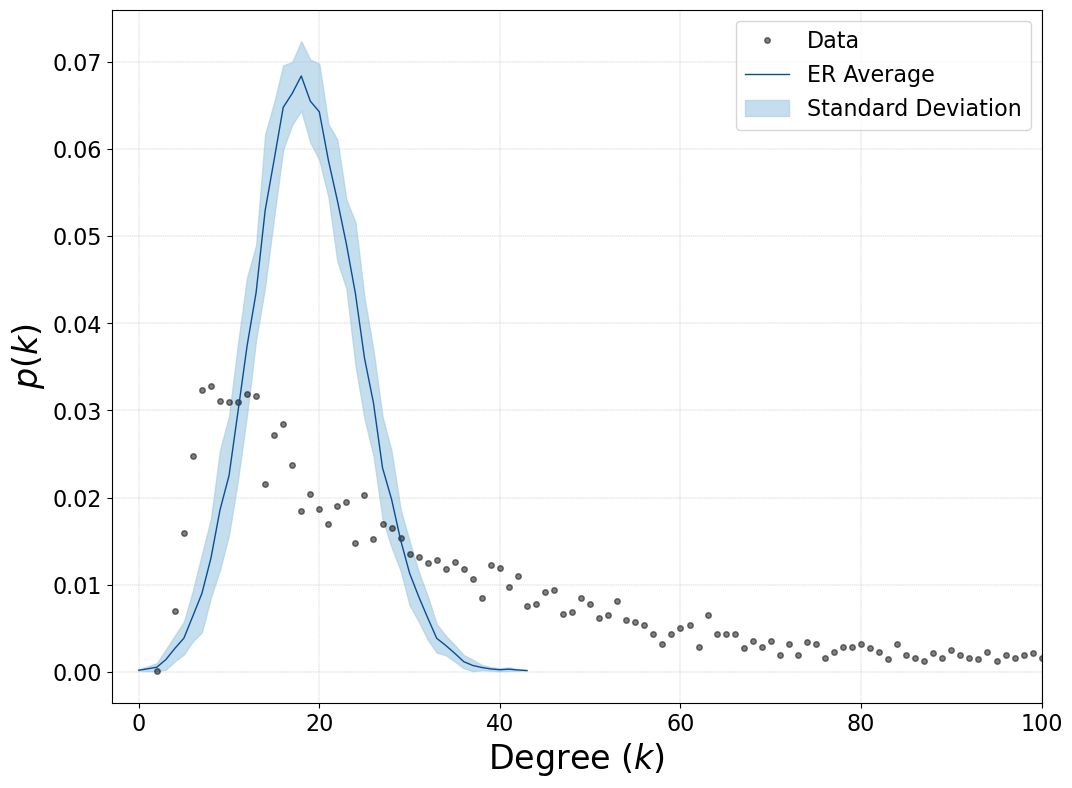

In [932]:
plt.figure(figsize=(12, 9))
plt.plot(k_values, pdf_real, linestyle='',label="Data",marker = 'o',markersize=4,color=cmap2[9],alpha=0.5)
# plt.plot(k_values, pdf_real, linestyle='--', marker='o', markersize=1.5, color='k', label="Real Network PDF")

plt.plot(k_model, avg_pdf,linewidth=1., label="ER Average", color=cmap[8])
# plt.plot(k_s_erdos,avg_erdos,linewidth=1., label="ER Avgerage", color=cmap[8])
plt.fill_between(k_model, avg_pdf - std_pdf, avg_pdf + std_pdf, alpha=0.7, color=cmap[3], label="Standard Deviation")
plt.xlabel(r"Degree $(k)$", fontsize=24)
plt.ylabel(r"$p(k)$", fontsize=24)
plt.legend(fontsize=16)
plt.grid(linestyle='--', linewidth=0.3)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xlim(-3,100)
# plt.title(f"PDF Comparison: Real vs ER Model", fontsize=16)
# plt.savefig('figures/pdf_ER.png', dpi=300, bbox_inches='tight')
plt.show()


In [934]:
avg_cdf, std_cdf, k_model = er_avg_cdf, er_std_cdf, np.arange(len(er_avg_cdf))

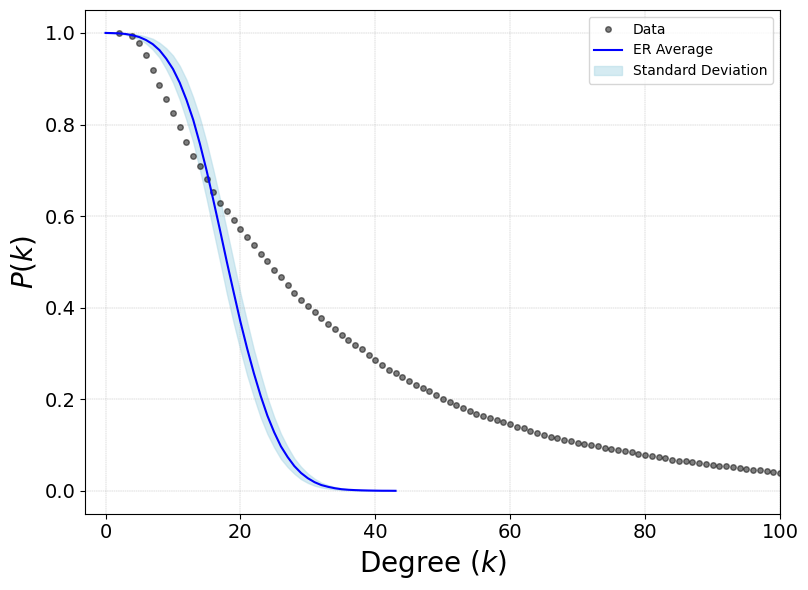

In [936]:
plt.figure(figsize=(8, 6))

plt.plot(k_values, 1+cdf_real[0]-np.array(cdf_real), linestyle='',label="Data",marker = 'o',markersize=4,color=cmap2[9],alpha=0.5)

plt.plot(k_model, 1+avg_cdf[0]-np.array(avg_cdf), label="ER Average", color="blue")
plt.fill_between(k_model, 1+avg_cdf[0] -np.array(avg_cdf - std_cdf), 1+avg_cdf[0]-np.array(avg_cdf + std_cdf), alpha=0.5, color="lightblue", label="Standard Deviation")


plt.xlabel(r"Degree $(k)$", fontsize=20)
plt.ylabel(r"$P(k)$", fontsize=20)
plt.legend()
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()

plt.grid(linestyle='--', linewidth=0.3)

plt.xlim(-3,100)
# plt.yscale('log')
# plt.title(f"CDF Comparison: Data vs ER Model", fontsize=16)
# plt.savefig('figures/cdf_ER.png', dpi=300, bbox_inches='tight')
plt.show()

### Barabasi

In [951]:
avg_pdf, std_pdf, k_model  = ba_avg_pdf, ba_std_pdf, np.arange(len(ba_avg_pdf))

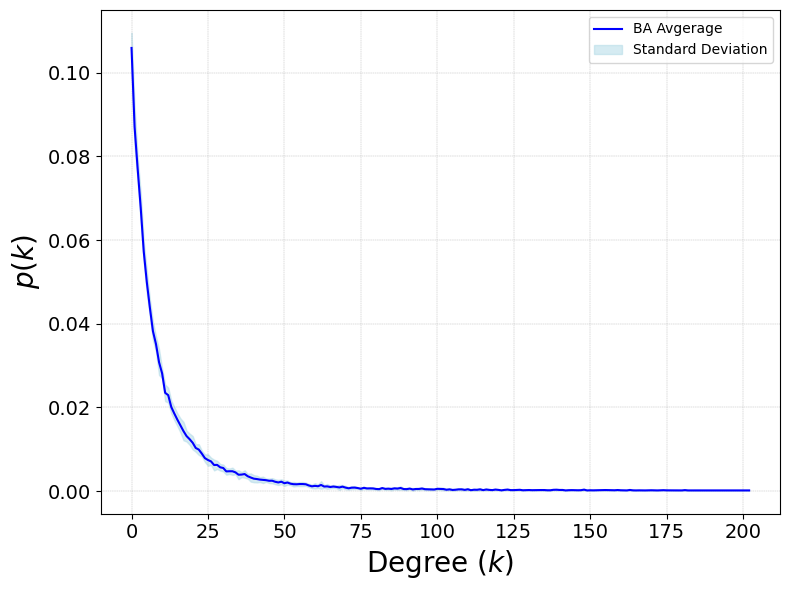

In [956]:
plt.figure(figsize=(8, 6))
# plt.plot(k_values, pdf_real, linestyle='-', label="Data", color="black")
# plt.plot(k_values, pdf_real, linestyle='--', marker='o', markersize=1.5, color='k', label="Real Network PDF")
# plt.plot(k_values, pdf_real, linestyle='', label="Data",marker = 'o',markersize=6,color=cmap2[9],alpha=0.5)

plt.plot(k_model, avg_pdf, label="BA Avgerage", color="blue")
plt.fill_between(k_model, avg_pdf - std_pdf, avg_pdf + std_pdf, alpha=0.5, color="lightblue", label="Standard Deviation")

plt.grid(linestyle='--', linewidth=0.3)
# plt.xscale('log')
# plt.yscale('log')

plt.xlabel(r"Degree $(k)$", fontsize=20)
plt.ylabel(r"$p(k)$", fontsize=20)
plt.legend()
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()


# plt.title(f"PDF Comparison: Data vs AB Model", fontsize=16)
# plt.savefig('figures/pdf_BA.png', dpi=300, bbox_inches='tight')
plt.show()


In [892]:
avg_cdf, std_cdf, k_model = ba_avg_cdf, ba_std_cdf, np.arange(len(ba_avg_cdf))

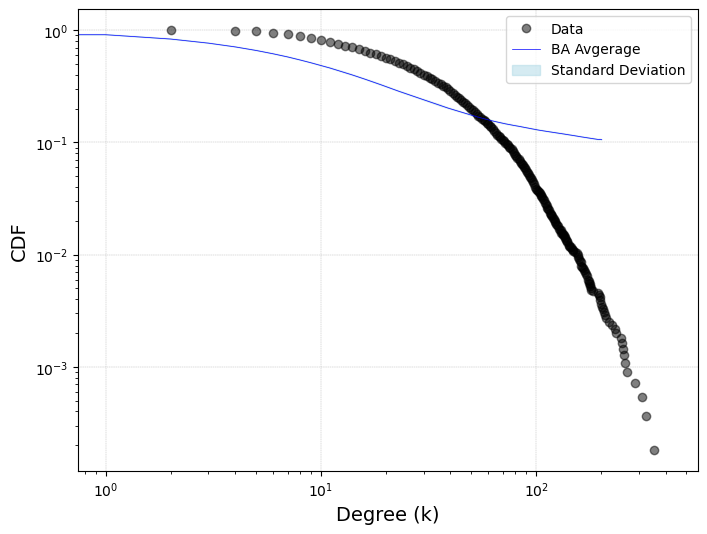

In [910]:
plt.figure(figsize=(8, 6))
plt.plot(k_values,1 - cdf_real,  linestyle='', label="Data",marker = 'o',markersize=6,color=cmap2[9],alpha=0.5)
plt.plot(k_model, 1 +avg_cdf[0]  - avg_cdf, linewidth = 0.5, label="BA Avgerage", color="blue")
plt.fill_between(k_model, 1 + avg_cdf[0] -(avg_cdf - std_cdf), 1+avg_cdf[0] -(avg_cdf + std_cdf), alpha=0.5, color="lightblue", label="Standard Deviation")
plt.xlabel("Degree (k)", fontsize=14)
plt.ylabel("CDF", fontsize=14)
plt.legend()
plt.grid(linestyle='--', linewidth=0.3)

plt.yscale('log')
plt.xscale('log')
# plt.yscale('log')
# plt.title(f"CDF Comparison: Data vs AB Model", fontsize=16)
# plt.savefig('figures/cdf_BA.png', dpi=300, bbox_inches='tight')
plt.show()

## Second trial

In [1037]:
def get_common_k_values(graphs):
    """Find the union of all unique degree values across multiple networks."""
    all_k_values = set()
    for graph in graphs:
        degrees = [d for _, d in graph.degree()]
        all_k_values.update(degrees)  # Collect all observed degree values
    return np.sort(list(all_k_values))  # Return sorted array of unique k-values

# Find common k-values for ER and BA networks
er_k_values = get_common_k_values(er_graphs)
ba_k_values = get_common_k_values(ba_graphs)

def calculate_pdf_cdf(graph, k_values_standard):
    """Compute PDF and CDF, ensuring alignment with predefined k-values."""
    degrees = np.array([d for _, d in graph.degree()])
    k_values, counts = np.unique(degrees, return_counts=True)
    
    # Initialize PDFs with zeros and fill known degree values
    pdf = np.zeros_like(k_values_standard, dtype=float)
    cdf = np.zeros_like(k_values_standard, dtype=float)
    
    for i, k in enumerate(k_values_standard):
        if k in k_values:
            pdf[i] = counts[k_values == k].sum() / counts.sum()  # Normalize
    cdf = np.cumsum(pdf)  # Compute cumulative distribution function

    return pdf, cdf


# Compute PDF & CDF for ER Networks
er_pdfs, er_cdfs = [], []
for graph in er_graphs:
    pdf, cdf = calculate_pdf_cdf(graph, er_k_values)
    er_pdfs.append(pdf)
    er_cdfs.append(cdf)

# Compute PDF & CDF for BA Networks
ba_pdfs, ba_cdfs = [], []
for graph in ba_graphs:
    pdf, cdf = calculate_pdf_cdf(graph, ba_k_values)
    ba_pdfs.append(pdf)
    ba_cdfs.append(cdf)

def get_average_distribution(dist_list):
    """Compute average and standard deviation of aligned distributions."""
    dist_array = np.array(dist_list)  # Convert list to NumPy array
    avg_dist = np.mean(dist_array, axis=0)
    std_dist = np.std(dist_array, axis=0)
    return avg_dist, std_dist

# ER Model
er_avg_pdf, er_std_pdf = get_average_distribution(er_pdfs)
er_avg_cdf, er_std_cdf = get_average_distribution(er_cdfs)

# BA Model
ba_avg_pdf, ba_std_pdf = get_average_distribution(ba_pdfs)
ba_avg_cdf, ba_std_cdf = get_average_distribution(ba_cdfs)


In [1042]:
## Erdos

In [2139]:
er_k_values

array([12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
       30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
       47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59])

In [2153]:
er_k_values[21], er_avg_pdf[21]

(34, 0.07060101375814626)

In [2137]:
max(er_avg_pdf)

0.07060101375814626

In [1046]:
len(er_avg_pdf), len(er_k_values)

(47, 47)

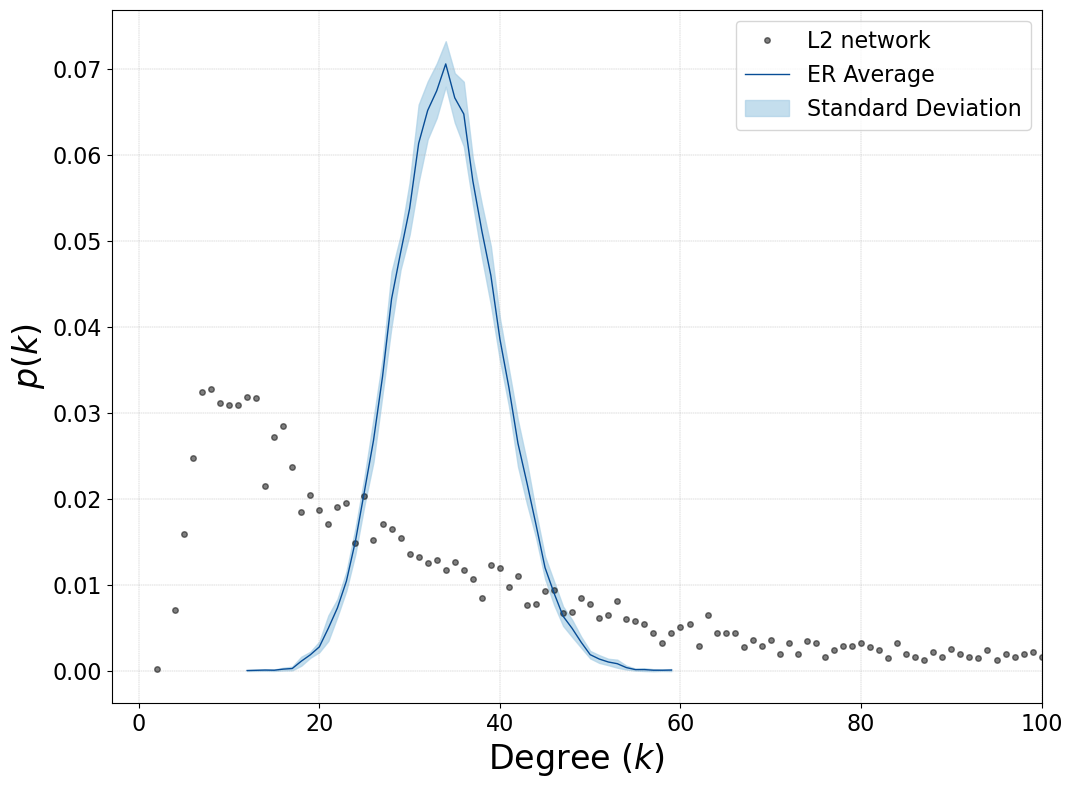

In [1312]:
plt.figure(figsize=(12, 9))
plt.plot(k_values_real, pdf_real, linestyle='',label="L2 network",marker = 'o',markersize=4,color=cmap2[9],alpha=0.5)
# plt.plot(k_values, pdf_real, linestyle='--', marker='o', markersize=1.5, color='k', label="Real Network PDF")

plt.plot(er_k_values, er_avg_pdf,linewidth=1., label="ER Average", color=cmap[8])
# plt.plot(k_s_erdos,avg_erdos,linewidth=1., label="ER Avgerage", color=cmap[8])
plt.fill_between(er_k_values, er_avg_pdf - er_std_pdf, er_avg_pdf + er_std_pdf, alpha=0.7, color=cmap[3], label="Standard Deviation")
plt.xlabel(r"Degree $(k)$", fontsize=24)
plt.ylabel(r"$p(k)$", fontsize=24)
plt.legend(fontsize=16)
plt.grid(linestyle='--', linewidth=0.3)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xlim(-3,100)
# plt.title(f"PDF Comparison: Real vs ER Model", fontsize=16)
plt.savefig('figures/pdf_ER.png', dpi=300, bbox_inches='tight')
plt.show()


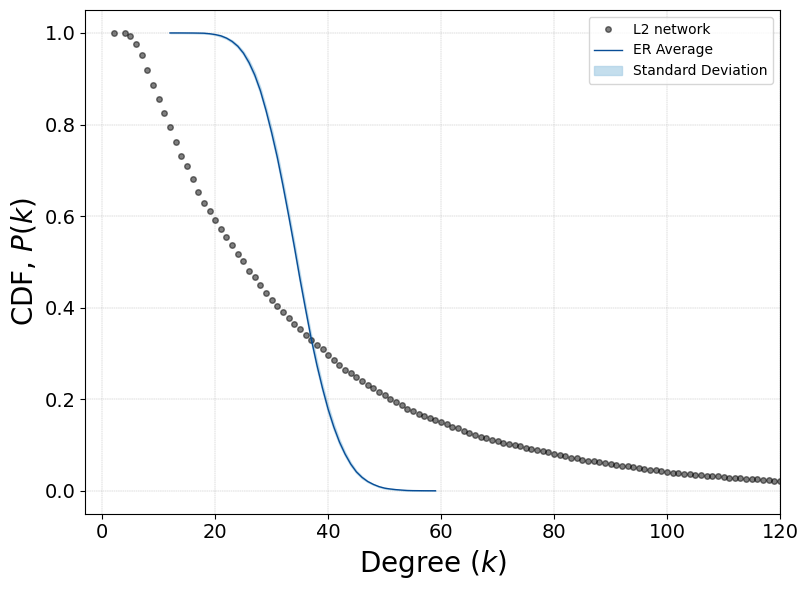

In [1310]:
plt.figure(figsize=(8, 6))
er_cdf = np.concatenate([np.array([0]), er_avg_cdf[:-1]])
plt.plot(k_values_real, 1- np.concatenate([np.array([0]), cdf_real[:-1]]), linestyle='',label="L2 network",marker = 'o',markersize=4,color=cmap2[9],alpha=0.5)

plt.plot(er_k_values, 1 -er_cdf , linewidth=1., label="ER Average", color=cmap[8])
plt.fill_between(er_k_values, 1 - (er_cdf - er_std_cdf), 1- (er_cdf + er_std_cdf),  alpha=0.7, color=cmap[3], label="Standard Deviation")

plt.xlabel(r"Degree $(k)$", fontsize=20)
plt.ylabel(r"CDF, $P(k)$", fontsize=20)
plt.legend()
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()

plt.grid(linestyle='--', linewidth=0.3)

plt.xlim(-3,120)
# plt.xscale('log')
# plt.title(f"CDF Comparison: Data vs ER Model", fontsize=16)
plt.savefig('figures/cdf_ER.png', dpi=300, bbox_inches='tight')
plt.show()

## Albert Barabasi

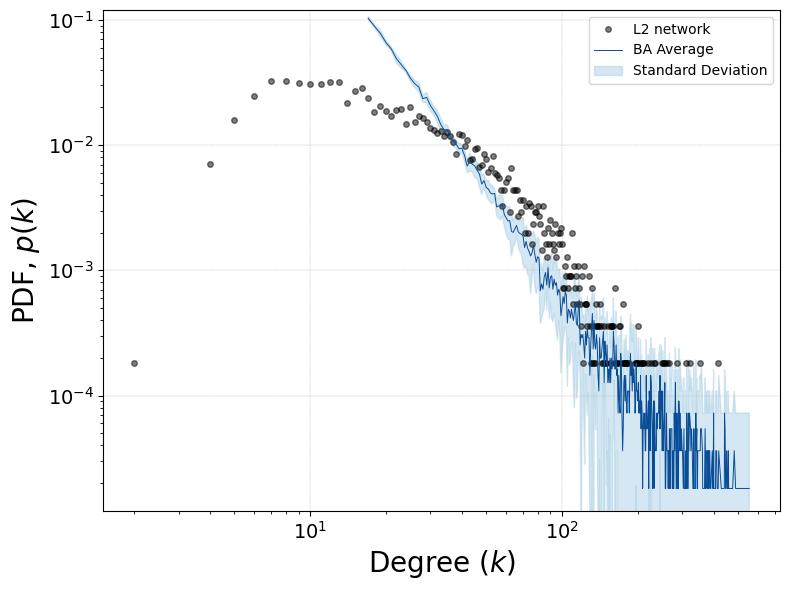

In [1314]:
plt.figure(figsize=(8, 6))

plt.plot(k_values_real, pdf_real, linestyle='',label="L2 network",marker = 'o',markersize=4,color=cmap2[9],alpha=0.5)

plt.plot(ba_k_values, ba_avg_pdf, linewidth=.7, label="BA Average", color=cmap[8])
plt.fill_between(ba_k_values, ba_avg_pdf - ba_std_pdf, ba_avg_pdf + ba_std_pdf, alpha=0.5, color=cmap[3], label="Standard Deviation")

plt.grid(linestyle='--', linewidth=0.3)
plt.xscale('log')
plt.yscale('log')

plt.xlabel(r"Degree $(k)$", fontsize=20)
plt.ylabel(r"PDF, $p(k)$", fontsize=20)
plt.legend()
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()

plt.ylim(1.2*10**-5,1.2*10**-1)

# plt.title(f"PDF Comparison: Data vs AB Model", fontsize=16)
plt.savefig('figures/pdf_BA.png', dpi=300, bbox_inches='tight')
plt.show()


In [1235]:
ba_new_cdf = np.concatenate([np.array([0]), ba_avg_cdf[:-1]])
ba_std = np.concatenate([np.array([0]), ba_std_cdf[:-1]])

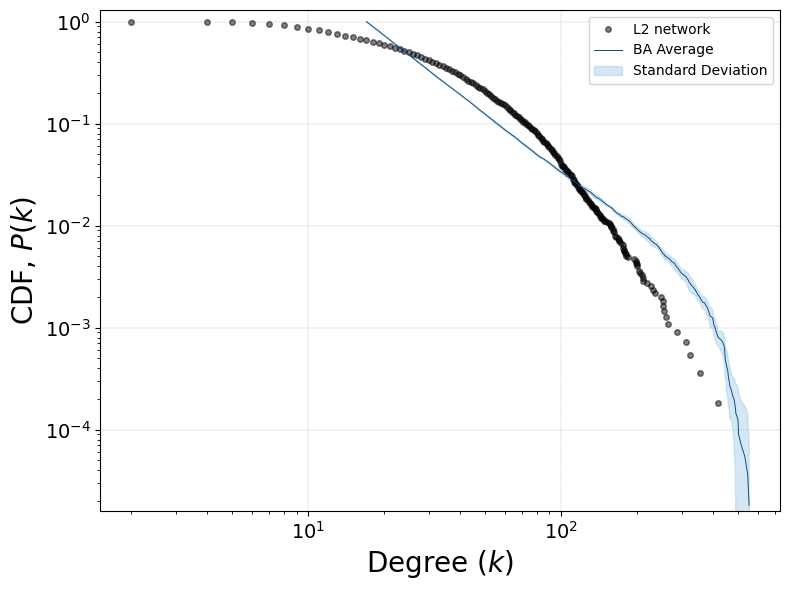

In [1315]:
plt.figure(figsize=(8, 6))

plt.plot(k_values_real, 1 - np.concatenate([np.array([0]), cdf_real[:-1]]), linestyle='',label="L2 network",marker = 'o',markersize=4,color=cmap2[9],alpha=0.5)

plt.plot(ba_k_values, 1 - ba_new_cdf, linewidth=.7, label="BA Average", color=cmap[8])
plt.fill_between(ba_k_values, 1  - (ba_new_cdf - ba_std), 1 - (ba_new_cdf + ba_std), alpha=0.5, color=cmap[3], label="Standard Deviation")

plt.xscale('log')
plt.yscale('log')


plt.xlabel(r"Degree $(k)$", fontsize=20)
plt.ylabel(r"CDF, $P(k)$", fontsize=20)
plt.legend()
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()

plt.grid(linestyle='--', linewidth=0.3)

plt.ylim(1.6*10**-5,1.3)
# plt.title(f"PDF Comparison: Data vs AB Model", fontsize=16)
plt.savefig('figures/cdf_BA.png', dpi=300, bbox_inches='tight')
plt.show()


## Part III: find communities and modularity

In [160]:
def compute_performance(G, communities):
    total_pairs = G.number_of_nodes() * (G.number_of_nodes() - 1) / 2
    intra_edges = sum(G.subgraph(comm).number_of_edges() for comm in communities)
    non_edges = sum(len(comm) * (len(comm) - 1) / 2 for comm in communities) - intra_edges
    return (intra_edges + non_edges) / total_pairs

### Greedy

In [ ]:
communities = list(community.greedy_modularity_communities(G))
modularity = community.modularity(G, communities)
print(f"Number of communities detected: {len(communities)}")
print(f"Modularity: {modularity:.4f}")


In [ ]:
for i, community_group in enumerate(communities, start=1):
    # print(f"Community {i}: {sorted(community_group)}")
results = {
    "Number of communities": len(communities),
    "Modularity": modularity,
    "Communities": {f"Community {i+1}": list(map(int, community)) for i, community in enumerate(communities)}
}

# # Be careful Save
# with open("results/community_detection_results.json", "w") as f:
#     json.dump(results, f, indent=4)


In [1393]:
with open("results/community_detection_results.json", "r") as f:
    loaded_results = json.load(f)

In [1395]:
loaded_results.keys()

dict_keys(['Number of communities', 'Modularity', 'Communities'])

In [1391]:
communities_greedy = loaded_results['Communities']

In [240]:
performance_greedy = compute_performance(G, Communities.values())

coverage_greedy, performance_greedy = nx_comm.partition_quality(G, communities_greedy.values())

print(f"Performance (Greedy): {performance_greedy:.4f}")
print(f"Coverage (Greedy): {coverage_greedy:.4f}")

Performance (Greedy): 0.6697
Coverage (Greedy): 0.8764


In [ ]:
communities = list(community.greedy_modularity_communities(G))
modularity = community.modularity(G, communities)
print(f"Number of communities detected: {len(communities)}")
print(f"Modularity: {modularity:.4f}")


### Louvain Algorithm

In [106]:
partition_louvain = community_louvain.best_partition(G)
communities_louvain = {}
for node, comm_id in partition_louvain.items():
    if comm_id not in communities_louvain:
        communities_louvain[comm_id] = []
    communities_louvain[comm_id].append(node)
modularity_louvain = community.modularity(G, communities_louvain.values())
print("\nLouvain Method:")
print(f"Number of communities detected: {len(communities_louvain)}")
print(f"Modularity: {modularity_louvain:.4f}")



Louvain Method:
Number of communities detected: 11
Modularity: 0.6065


In [238]:
performance_louvain = compute_performance(G, communities_louvain.values())

coverage_louvain, performance_louvain = nx_comm.partition_quality(G, communities_louvain.values())

print(f"Performance (Louvain): {performance_louvain:.4f}")
print(f"Coverage (Louvain): {coverage_louvain:.4f}")

Performance (Louvain): 0.8800
Coverage (Louvain): 0.7266


### Girvan-Newman Algorithm

In [670]:
gen_gn_comm = community.girvan_newman(G)

In [672]:
while True:
    try:
        gn_comm_n = next(gen_gn_comm)
    except StopIteration:
        break
    except KeyboardInterrupt:
        break
    
    ult_gn = gn_comm_n
    N_communities = len(gn_comm_n)
    
    if N_communities > 20:
        with open(f"girvan_newman_{N_communities}.pkl", "wb") as f:
            pickle.dump(gn_comm_n, f)
            
    print(f"Number of communities: {N_communities}")
    print(f"Modularity of the partition: {nx_comm.modularity(G, gn_comm_n)}")
    
    if N_communities > 30:
        break

## Part IV Visualize the network 

### Positions

In [1617]:
positions = [data['pos'] for node, data in G.nodes(data=True) if 'pos' in data]
pos = np.array(positions) 

### Sizes

In [1702]:
node_sizes = [400 * centralities["degree"][node] for node in G.nodes()]

### Shape

In [1591]:
# Load the top 25 centralities data
centralities_file = "top_25_centralities_combined.csv"  # Replace with the correct file path if needed
top_25_centralities = pd.read_csv(centralities_file)
top_25_centralities
# Extract the list of unique nodes ranked in the top 25 for any centrality metric
top_25_nodes = set()
for column in top_25_centralities.columns:
    if column.startswith("Node"):
        top_25_nodes.update(top_25_centralities[column].unique())



In [2350]:
top_51_nodes = set([
    260, 312, 571, 524, 249, 586, 372, 315, 1540, 76, 951, 481, 64, 1522, 
    852, 202, 570, 1102, 1763, 860, 142, 231, 822, 509, 563, 356, 247, 1262, 
    508, 169, 1568, 549, 2507, 1760, 262, 2149, 1971, 399, 1986, 439, 1705, 
    311, 1139, 282, 793, 1736, 1077, 855, 2510, 257, 1987
])


# Create a mapping to distinguish these nodes
node_shapes = {node: 's' if node in top_50_nodes else 'o' for node in G.nodes()}  # Squares for top nodes, circles otherwise

# node_shapes = {node: 'd' if node in top_50_nodes else 'o' for node in G.nodes()}  # Squares for top nodes, circles otherwise
# Bordes de los nodos (negro para destacar mejor)
node_edge_colors = {node: cmap2[7] if node in top_50_nodes else node_colors[node] for node in G.nodes()}

node_linewidths = {node: 0.5 if node in top_50_nodes else 1.0 for node in G.nodes()}

In [1878]:
# Compute the diameter of the network (longest shortest path)
diameter_nodes = nx.diameter(G)
shortest_paths = nx.all_pairs_shortest_path(G)

# Find the pair of nodes with the longest shortest path (diameter nodes)
diameter_path = []
max_length = 0

for source, paths in shortest_paths:
    for target, path in paths.items():
        if len(path) > max_length:
            max_length = len(path)
            diameter_path = path



### Colors

#### Louvain

In [1743]:
unique_communities = list(set(partition_louvain.values()))
color_map = {comm_id: plt.colormaps.get_cmap("tab20")(i % 11) for i, comm_id in enumerate(unique_communities)}
node_colors = [color_map[partition_louvain[node]] for node in G.nodes()]


In [1872]:
# Position nodes based on communities
def get_community_layout(G, partition,pos1):
    """Position nodes so that communities are grouped together."""
      # Initial layout
    community_positions = {}
    
    for comm_id, nodes in partition.items():
        center_x, center_y = np.mean([pos[n] for n in nodes], axis=0)  # Community center
        for n in nodes:
            pos1[n] = pos1[n] + (0.8*(center_x + np.random.uniform(-0.005, 0.005)), 0.7*(center_y + np.random.uniform(-0.01, 0.01)))
    
    return pos1
pos1=pos.copy()
pos2 = get_community_layout(G, communities_louvain,pos1)

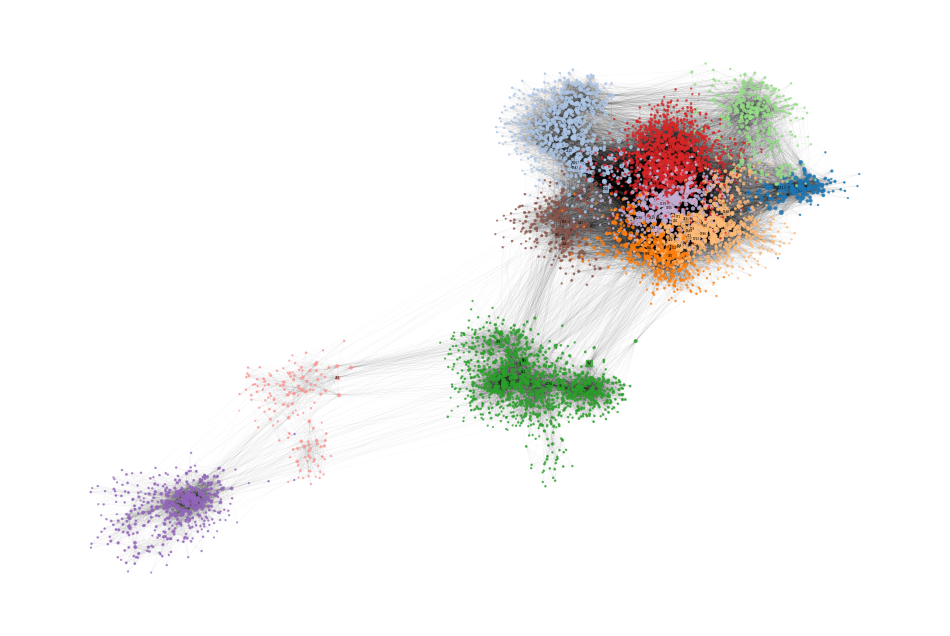

In [1876]:
# Drawing
plt.figure(figsize=(12, 8))
# pos = nx.spring_layout(G, seed=42)
# nx.draw_networkx_nodes(G, pos1, node_color=node_colors, node_size=node_sizes, alpha=0.8)

# Draw nodes with different shapes
for shape in set(node_shapes.values()):  
    nodes_to_draw = [node for node in G.nodes() if node_shapes[node] == shape]
    nx.draw_networkx_nodes(
        G, pos1, nodelist=nodes_to_draw, 
        node_color=[node_colors[i] for i in nodes_to_draw],  # Keep original colors
        node_size=[node_sizes[i] for i in nodes_to_draw],  # Keep original sizes
        alpha=0.75,
        node_shape=shape  # Apply different shapes
    )
labels = {node: str(node) for node in top_50_nodes if node in G.nodes}
nx.draw_networkx_labels(G, pos1, labels=labels, font_size=2, font_color='black')

nx.draw_networkx_edges(G, pos1, alpha=0.4, width=0.025)
plt.axis("off")
# plt.title("Network Visualization with Louvain Communities", fontsize=16)
plt.savefig("figures/louvain_network_visualization.png", bbox_inches="tight", pad_inches=0.1, dpi=500)

plt.show()


#### Greedy

In [2216]:
def get_community_colors(G, communities):
    node_color_map = {}
    colors = plt.colormaps.get_cmap("tab10").colors  
    for idx, (comm_name, community_group) in enumerate(communities.items()):  # Iterate over dictionary
        for node in community_group:
            node_color_map[node] = colors[idx % len(colors)]
    return [node_color_map.get(node, "gray") for node in G.nodes()]  # Default to gray if missing


In [2218]:
len(communities_greedy)

4

In [2220]:
node_colors = get_community_colors(G, communities_greedy)

In [2222]:
communities_greedy.keys()

dict_keys(['Community 1', 'Community 2', 'Community 3', 'Community 4'])

In [2224]:
positions = [data['pos'] for node, data in G.nodes(data=True) if 'pos' in data]
pos = np.array(positions) 

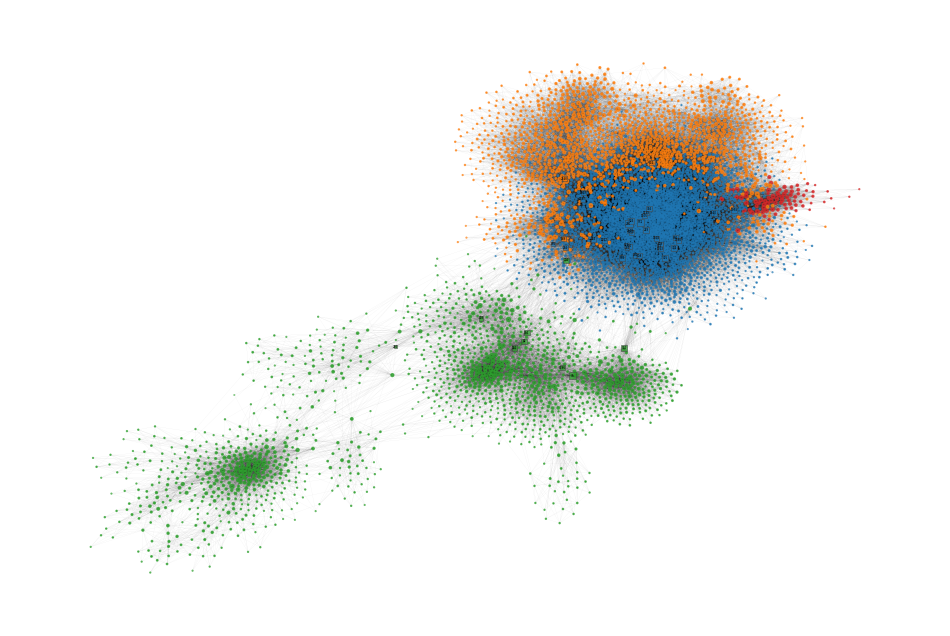

In [2352]:
plt.figure(figsize=(12, 8))
# plt.title("Network Visualization with Communities and Centrality", fontsize=16)
# plt.title("Network Visualization with Communities and Centrality", fontsize=16)
for shape in set(node_shapes.values()):  
    nodes_to_draw = [node for node in G.nodes() if node_shapes[node] == shape]
    nx.draw_networkx_nodes(
        G, pos, nodelist=nodes_to_draw, 
        node_color=[node_colors[i] for i in nodes_to_draw],  # Keep original colors
        edgecolors=[node_edge_colors[i] for i in nodes_to_draw],  # Black for top nodes, hidden for others
        linewidths=[node_linewidths[i] for i in nodes_to_draw],
        node_size=[node_sizes[i] for i in nodes_to_draw],  # Keep original sizes
        alpha=0.75,
        node_shape=shape  # Apply different shapes
    )
    
labels = {node: str(node) for node in top_50_nodes if node in G.nodes}
nx.draw_networkx_labels(G, pos, labels=labels, font_size=2, font_color='black')
nx.draw_networkx_edges(G, pos, alpha=0.4, width=0.025)
plt.axis("off")
plt.savefig("figures/network_visualization.png", bbox_inches="tight", pad_inches=0.1, dpi=500)
plt.show()

#### Other

In [1367]:
# pos = nx.spring_layout(G, seed=42)

In [1373]:
# Load the edge betweenness centrality data from the file
# with open("edge_betweenness.pkl", "rb") as file:
#     edge_betweenness = pickle.load(file)

# Check the loaded data (optional)
# print(edge_betweenness)


In [1371]:
node_colors = get_community_colors(G, communities)
node_sizes = [200 * centralities["degree"][node] for node in G.nodes()]
positions = [data['pos'] for node, data in G.nodes(data=True) if 'pos' in data]
pos = np.array(positions) 

NameError: name 'communities' is not defined

In [89]:
# edge_betweenness = nx.edge_betweenness_centrality(G)


In [91]:
max(edge_betweenness)

(5476, 5502)

In [93]:
edge_widths = [edge_betweenness[edge] * 100 for edge in G.edges()]

In [95]:
# # Save the edge betweenness centrality to a file
# with open("edge_betweenness.pkl", "wb") as file:
#     pickle.dump(edge_betweenness, file)

In [97]:
# import matplotlib.patches as mpatches
# legend_elements = [
#     mpatches.Patch(color='blue', label='Community 1'),
#     mpatches.Patch(color='green', label='Community 2'),
#     mpatches.Patch(color='red', label='Community 3'),
# ]
# plt.legend(handles=legend_elements, loc="upper left")


In [101]:
# top_25_centralities

In [108]:
node_shapes[260]

's'

In [110]:
# # Set minimum and maximum widths
# min_width = 0.5  # Minimum edge width
# max_width = 3.0  # Maximum edge width

# # Normalize edge betweenness to the range [min_width, max_width]
# edge_widths = []
# for edge in G.edges():
#     betweenness = edge_betweenness[edge]
#     normalized_width = min_width + (max_width - min_width) * ((betweenness - min(edge_betweenness.values())) /
#                                                              (max(edge_betweenness.values()) - min(edge_betweenness.values())))
#     edge_widths.append(normalized_width)

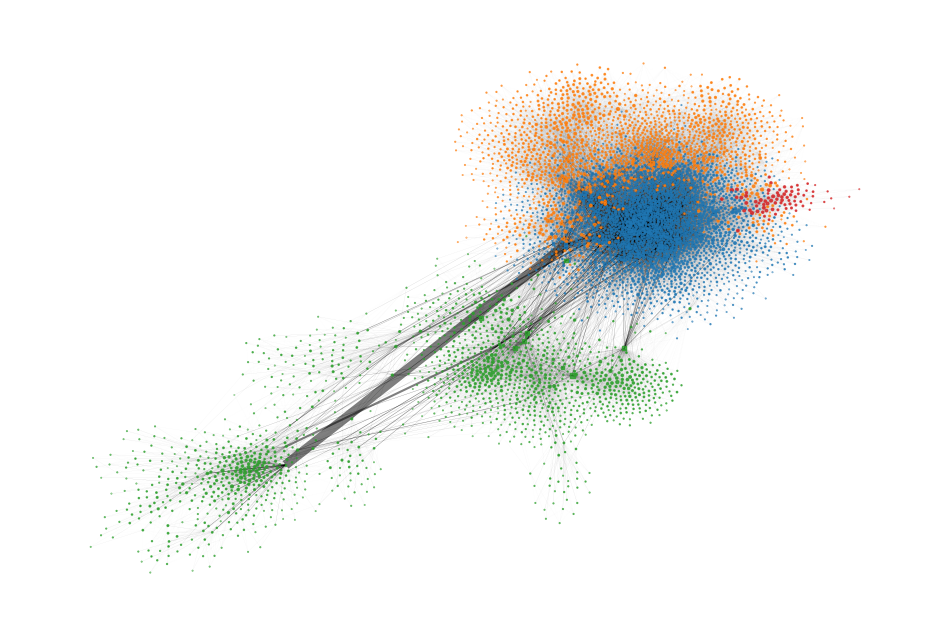

In [112]:
# Visualization with adjusted node_size for specific groups
plt.figure(figsize=(12, 8))

# Draw nodes with different shapes
for shape in set(node_shapes.values()):
    nodes_to_draw = [node for node, shape_type in node_shapes.items() if shape_type == shape]
    size_for_nodes = [node_sizes[list(G.nodes()).index(node)] for node in nodes_to_draw]  # Adjust size
    nx.draw_networkx_nodes(
        G,
        pos,
        nodelist=nodes_to_draw,
        node_shape=shape,
        node_size=size_for_nodes,  # Use the correct size for the subset
        node_color=[node_colors[list(G.nodes()).index(node)] for node in nodes_to_draw],  # Adjust colors too
        alpha=0.8,
    )

# Draw edges
nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.5)
# Add labels for top 25 nodes
nx.draw_networkx_labels(G, pos, labels={node: node for node in top_25_nodes}, font_size=8, font_color="black")
plt.savefig("trial_network_visualization_chat.png", bbox_inches="tight", pad_inches=0.1, dpi=300)
# Finalize plot
plt.axis("off")
plt.show()


## old

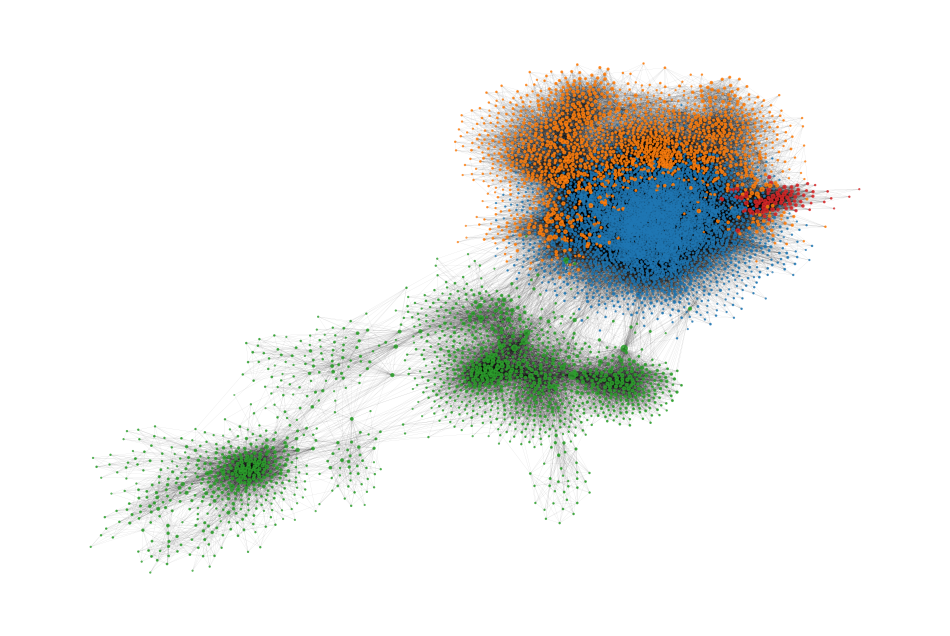

In [2196]:
plt.figure(figsize=(12, 8))
# plt.title("Network Visualization with Communities and Centrality", fontsize=16)
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes, alpha=0.8)
nx.draw_networkx_edges(G, pos, alpha=0.5, width=0.04)
plt.axis("off")
# plt.savefig("network_visualization.png", bbox_inches="tight", pad_inches=0.1, dpi=300)
plt.show()

### Thanks for reading :D